In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT\house-prices-advanced-regression-techniques/test.csv')

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
data.drop('Id', axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

<Axes: xlabel='SalePrice', ylabel='Count'>

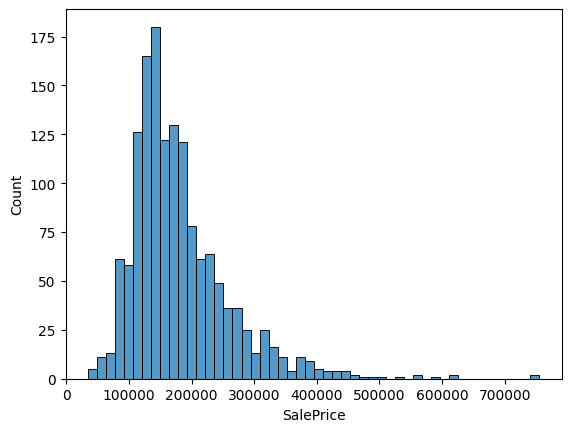

In [14]:
sns.histplot(data=data, x='SalePrice', bins=50)

<Axes: xlabel='SalePrice', ylabel='Count'>

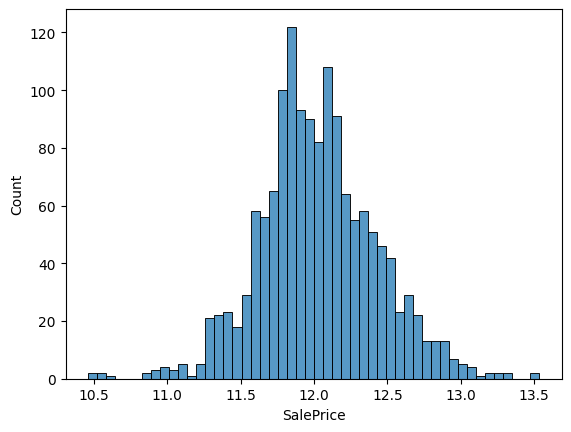

In [16]:
sns.histplot(np.log(data['SalePrice']), bins=50)

In [18]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['MSSubClass']


len(cat_vars)

44

In [20]:
data[cat_vars] = data[cat_vars].astype('O')

In [22]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]
len(num_vars)

35

In [24]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

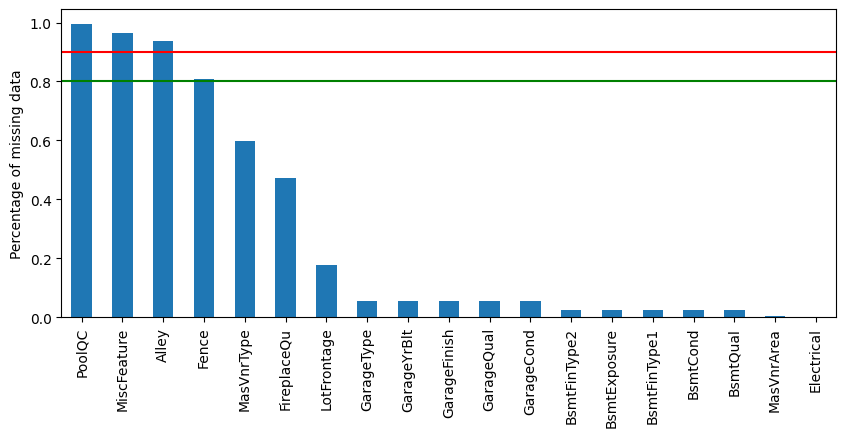

In [26]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [28]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [30]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [34]:
def na_value_vs_target(df, var):
    
    df = df.copy()
    # 1 if observation is missing, else 0
    df[var] = np.where(df[var].isnull(), 1, 0) 
    # comparing mean price for those groups 0 and 1 (where data missing)
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    #plot as bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
    xerr="std", title="Sale Price", color='green')
    
    plt.show()

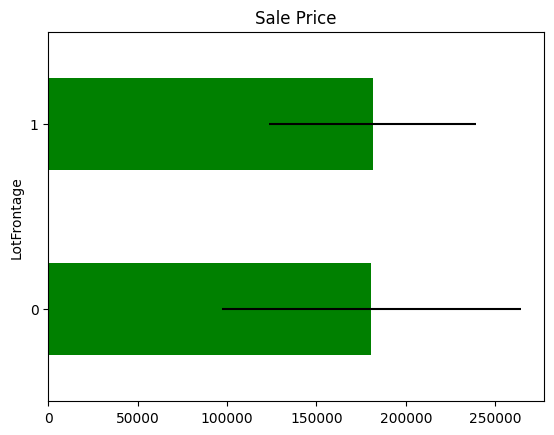

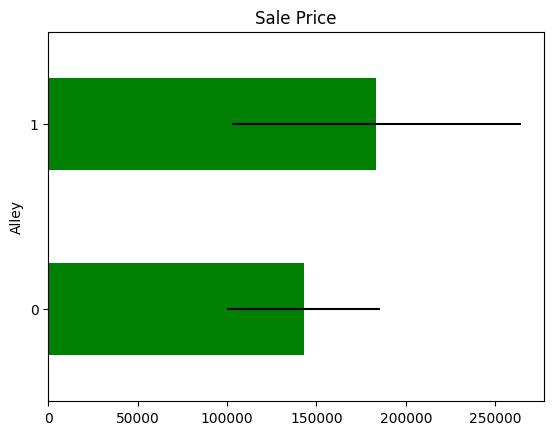

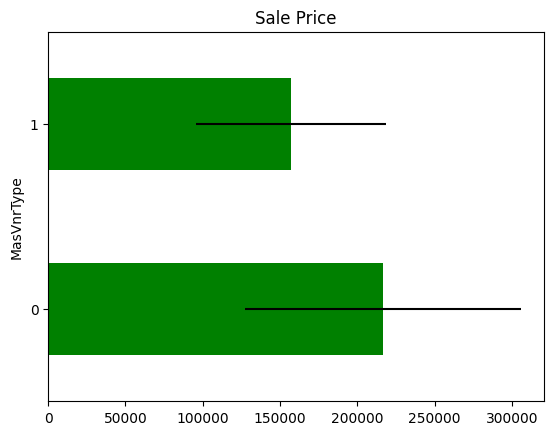

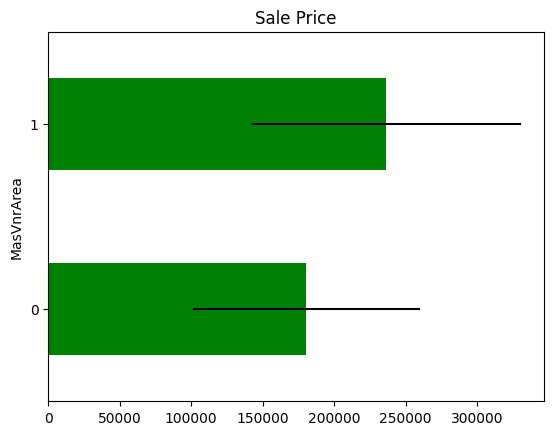

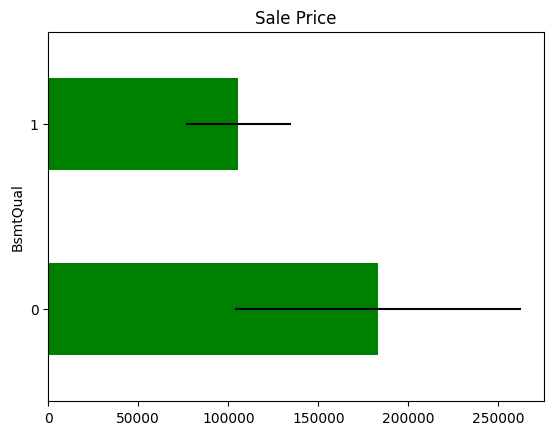

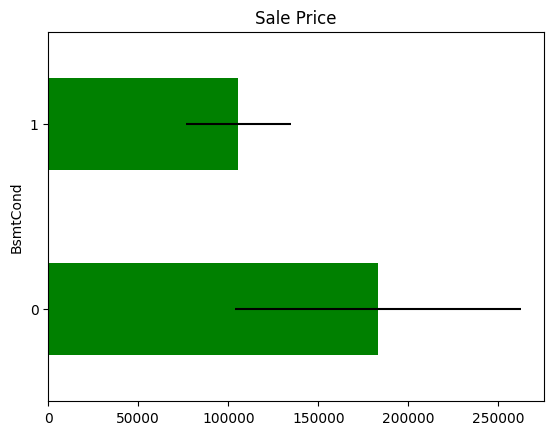

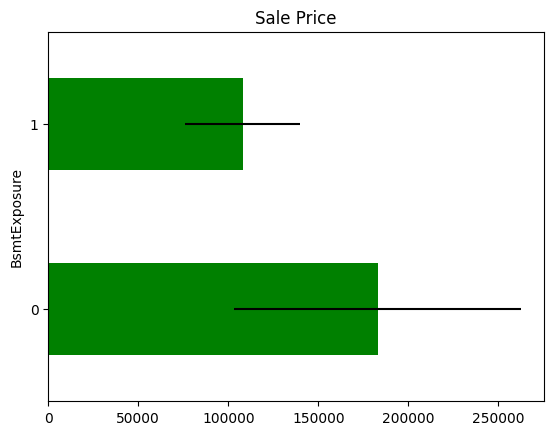

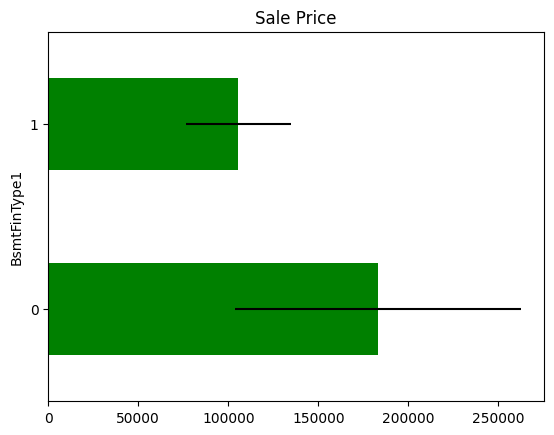

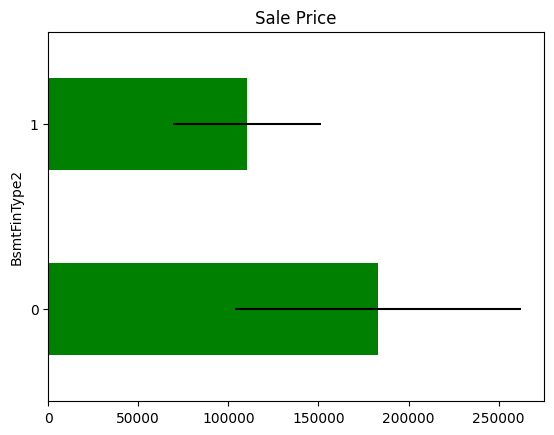

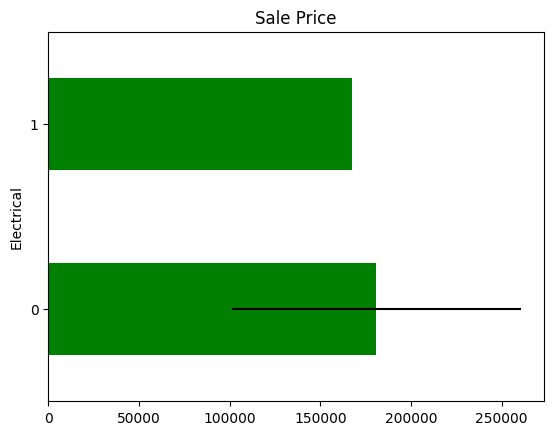

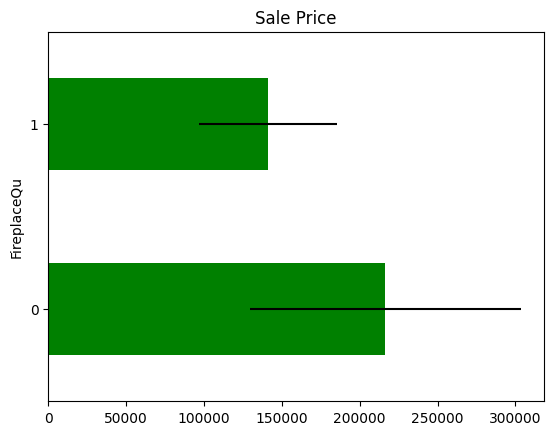

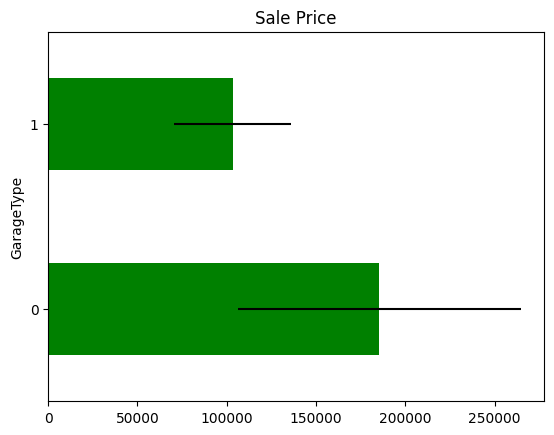

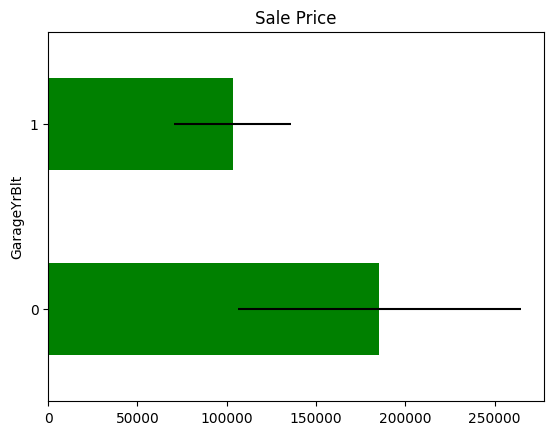

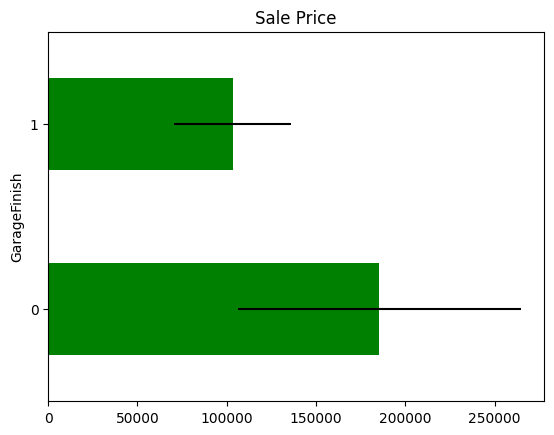

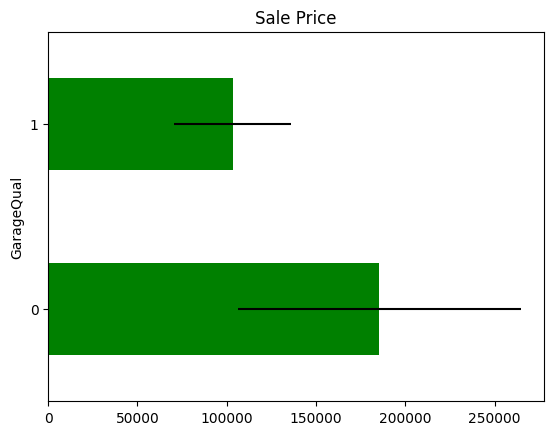

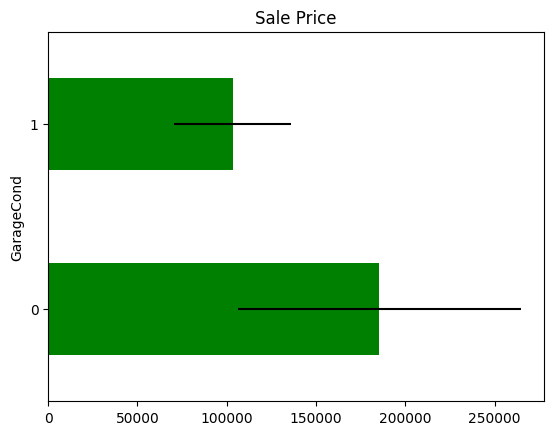

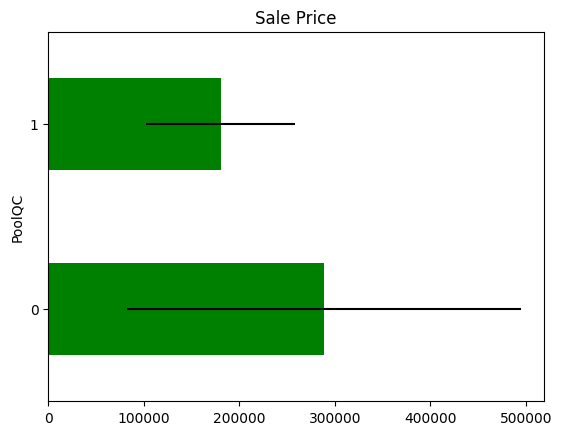

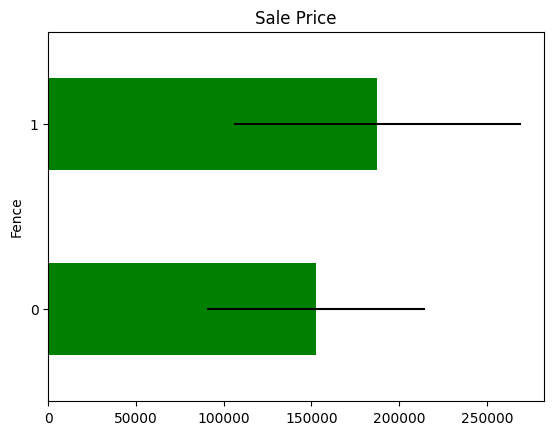

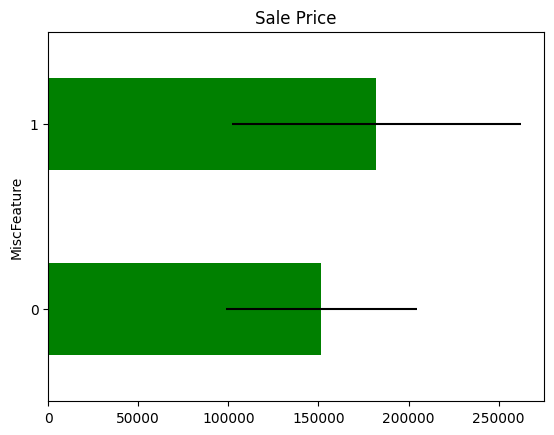

In [36]:
for var in vars_with_na:
    na_value_vs_target(data, var)

In [38]:
print("Number of num variables: ",len(num_vars))
data[num_vars].head()

Number of num variables:  35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [40]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [42]:
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

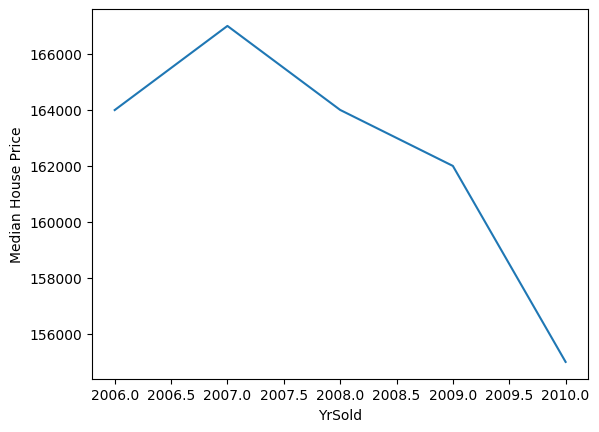

In [44]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

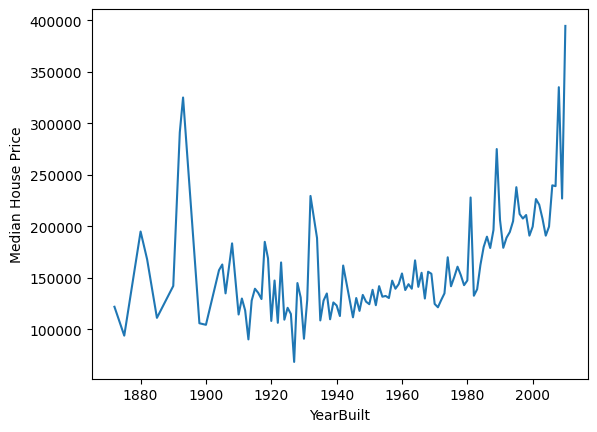

In [46]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

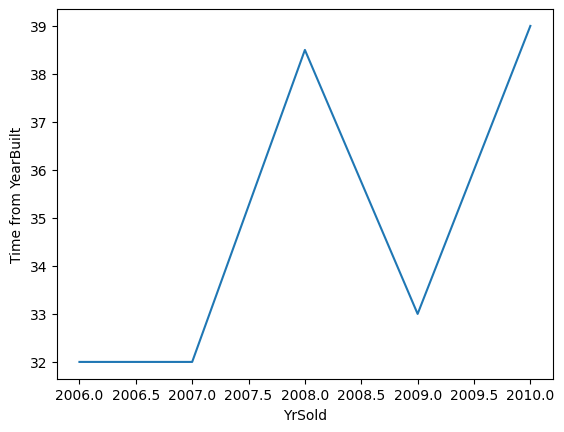

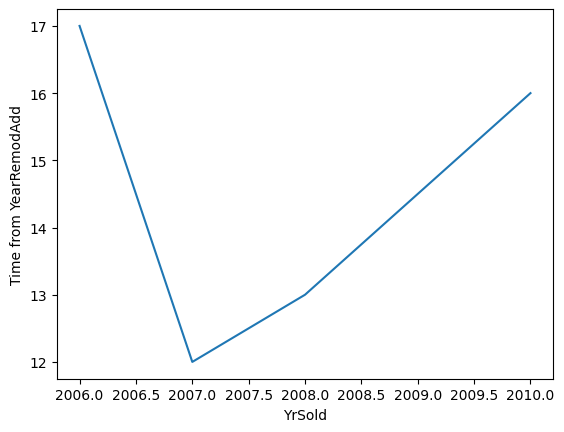

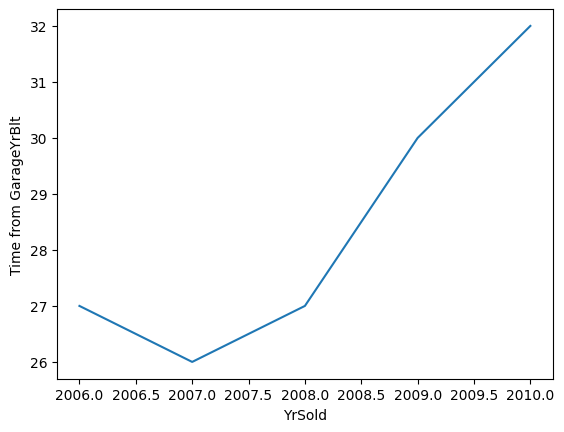

In [48]:
def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()


for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

In [50]:
data['YrSold'] - data['GarageYrBlt']

0        5.0
1       31.0
2        7.0
3        8.0
4        8.0
        ... 
1455     8.0
1456    32.0
1457    69.0
1458    60.0
1459    43.0
Length: 1460, dtype: float64

In [52]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

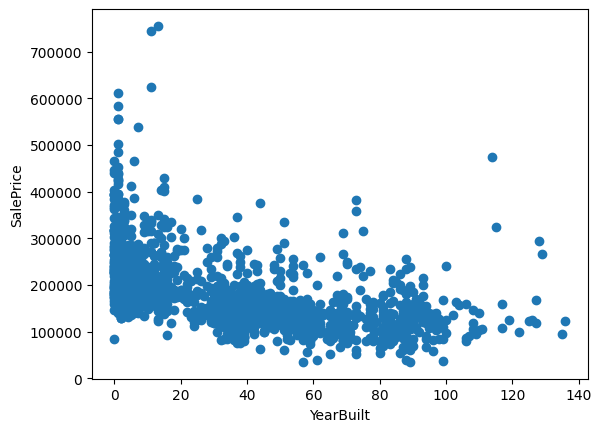

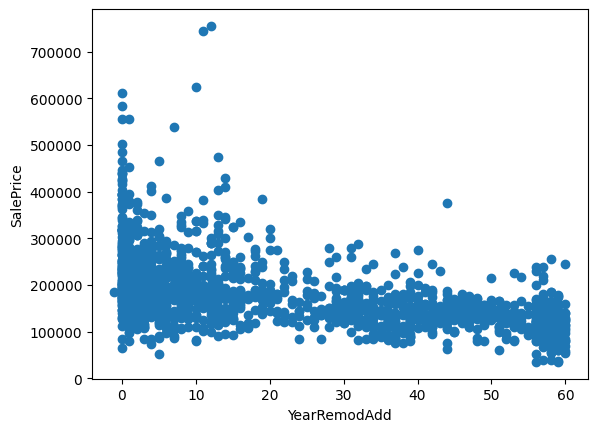

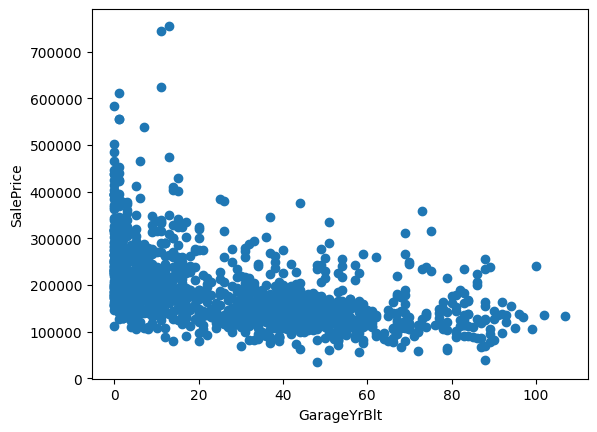

In [54]:
def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()


for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)


In [56]:
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [58]:
data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

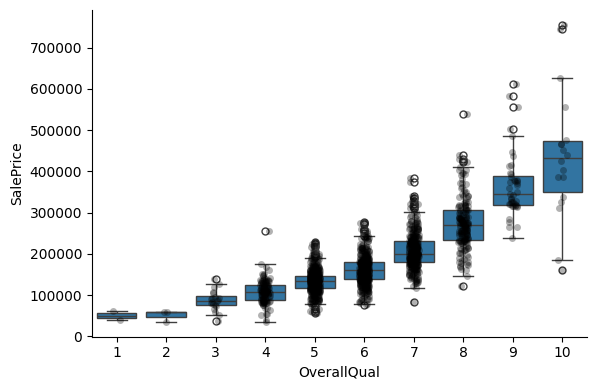

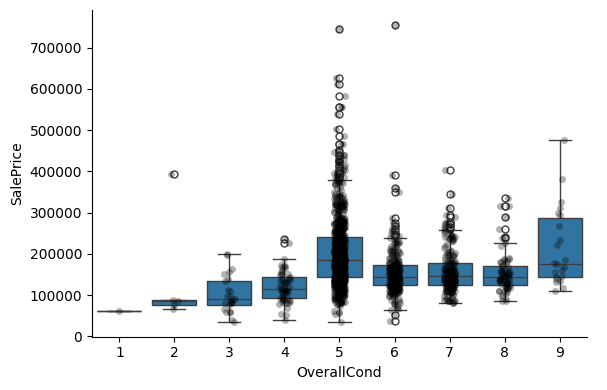

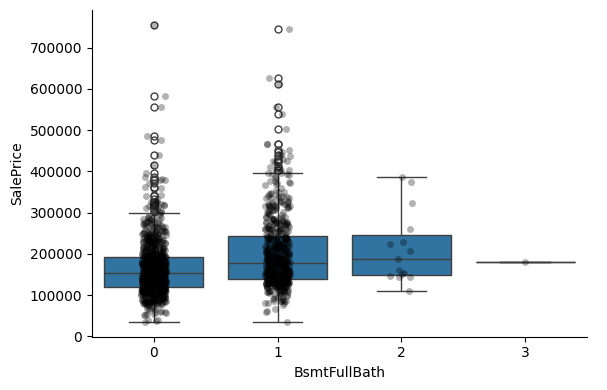

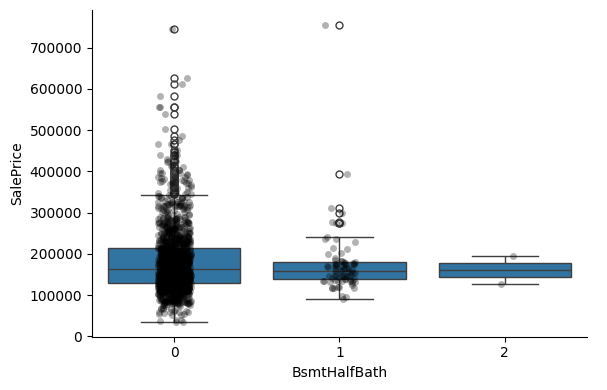

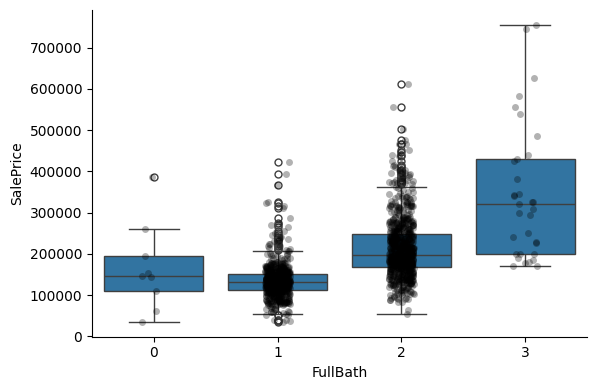

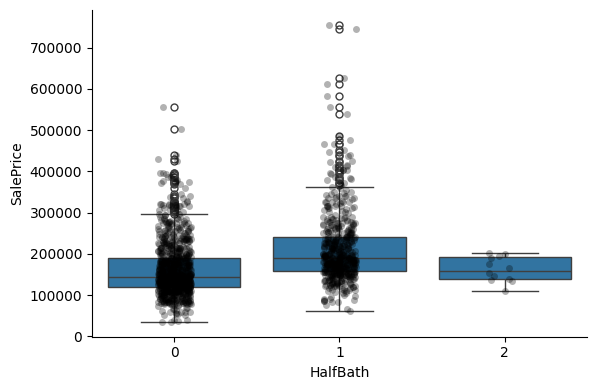

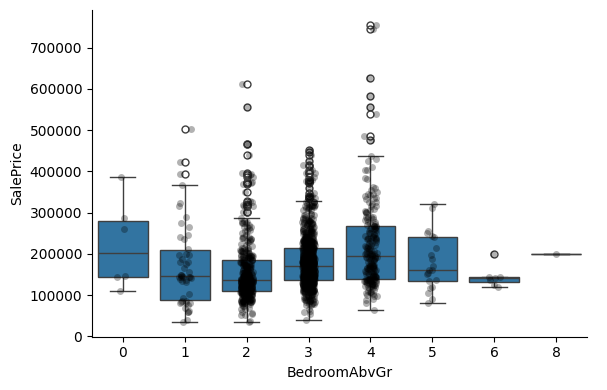

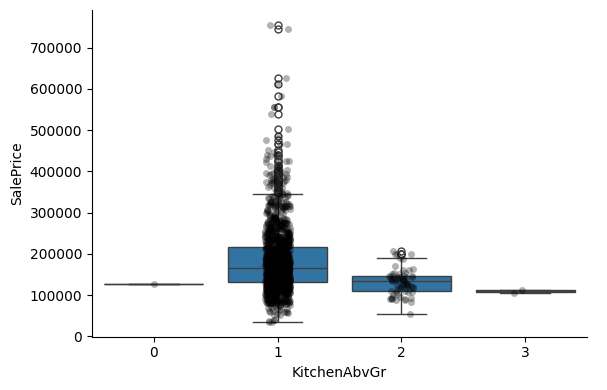

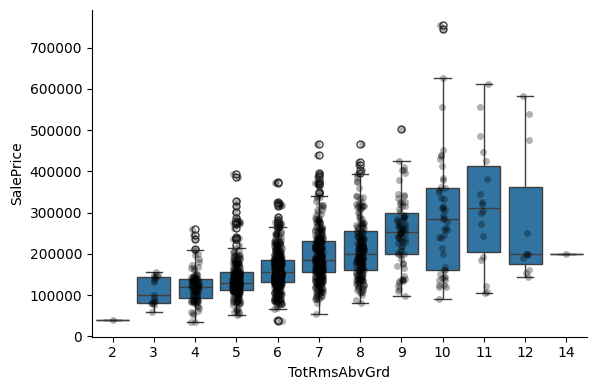

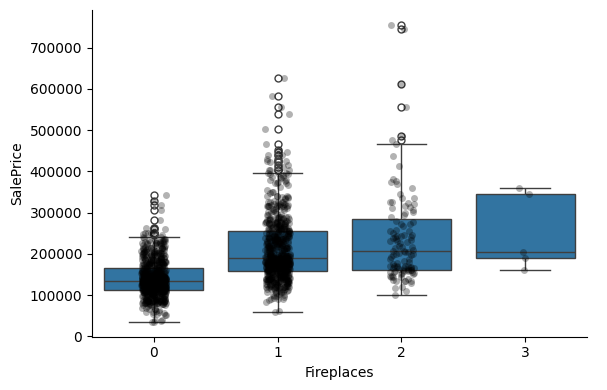

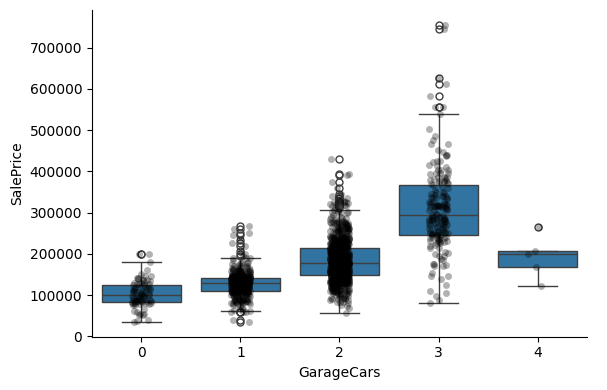

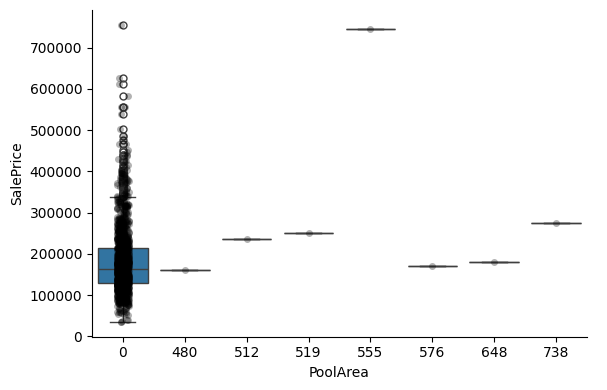

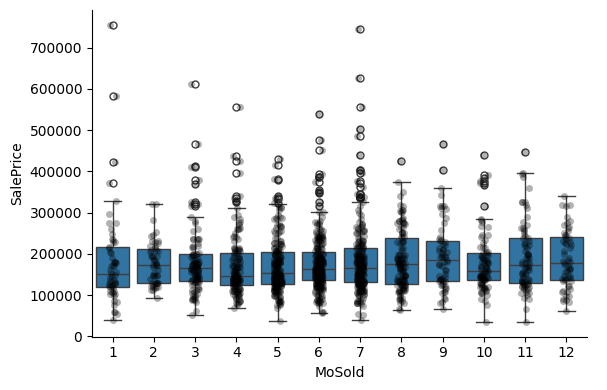

In [60]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [62]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [64]:
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

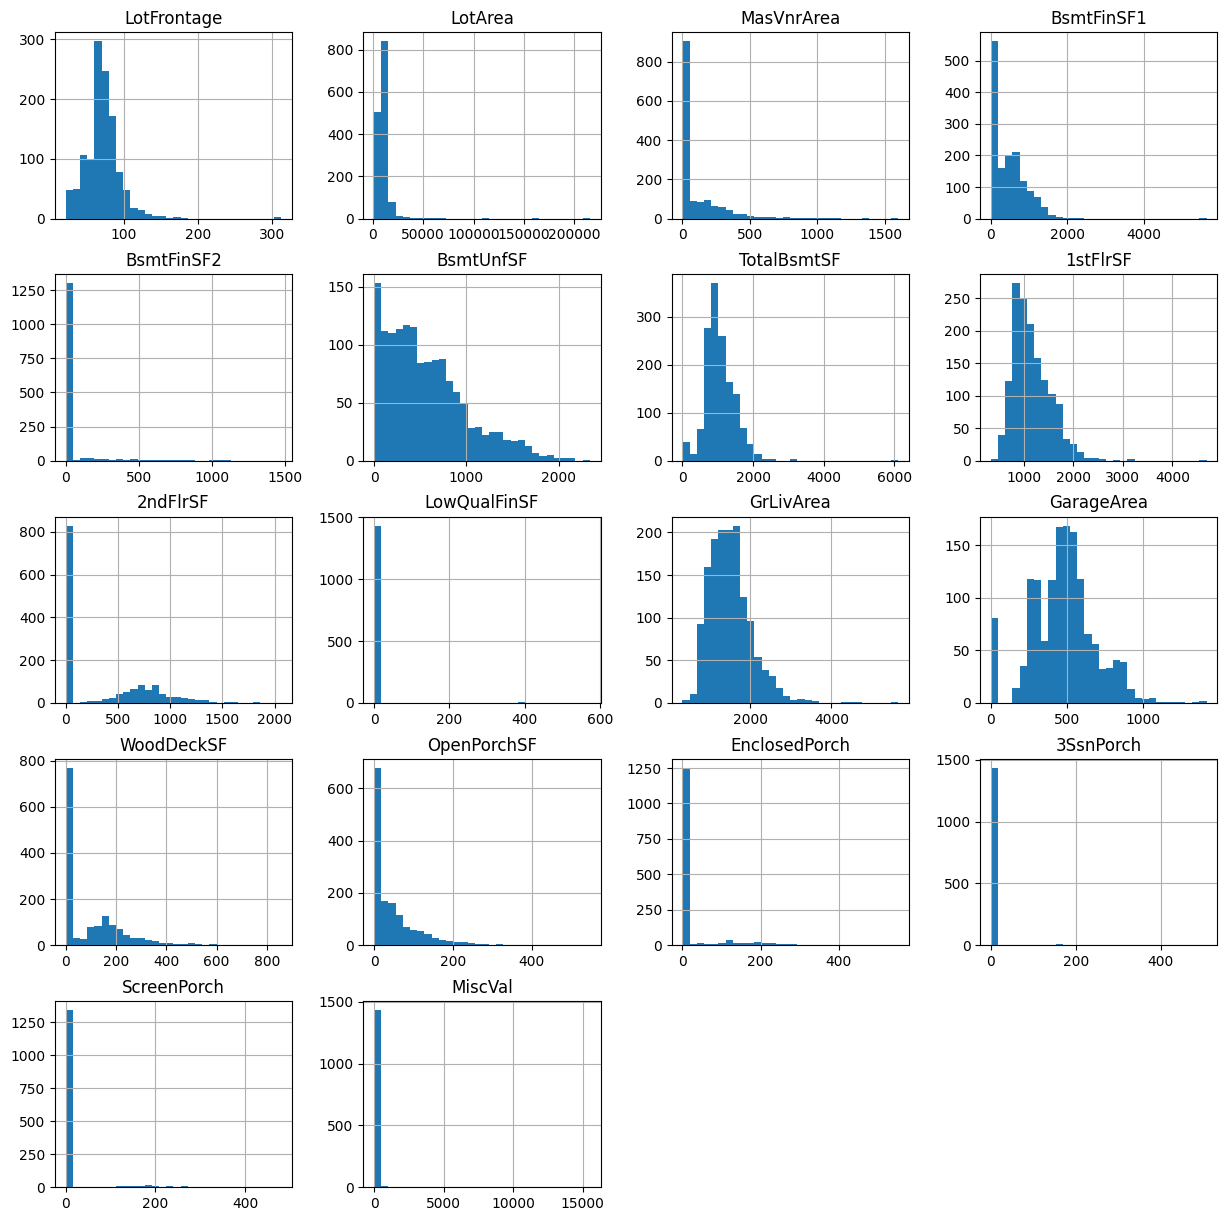

In [66]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [68]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [70]:
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

In [72]:
import scipy.stats as stats

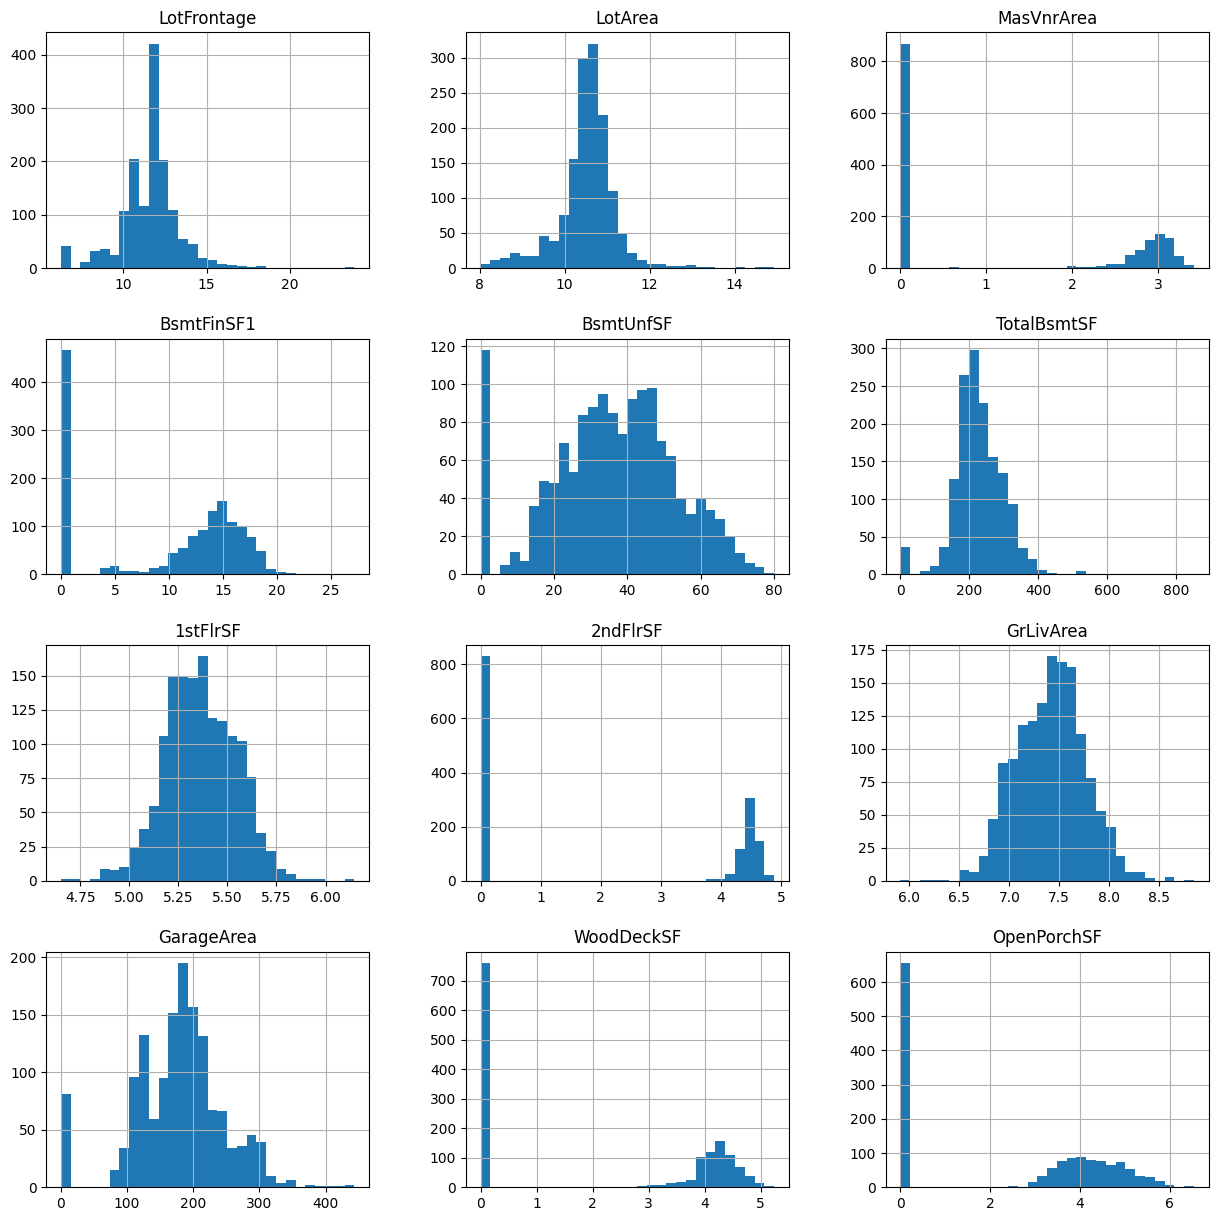

In [74]:
tmp = data.copy()

for var in cont_vars:
    # Replace inf and -inf with NaN, then fill NaN with the column median
    tmp[var] = data[var].replace([np.inf, -np.inf], np.nan)
    
    # Option 1: Fill NaN with the median value
    tmp[var].fillna(tmp[var].median(), inplace=True)
    
    # Option 2: Alternatively, you can drop NaN values
    # tmp[var].dropna(inplace=True)

    # Apply the Yeo-Johnson transformation
    tmp[var], param = stats.yeojohnson(tmp[var])


# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()


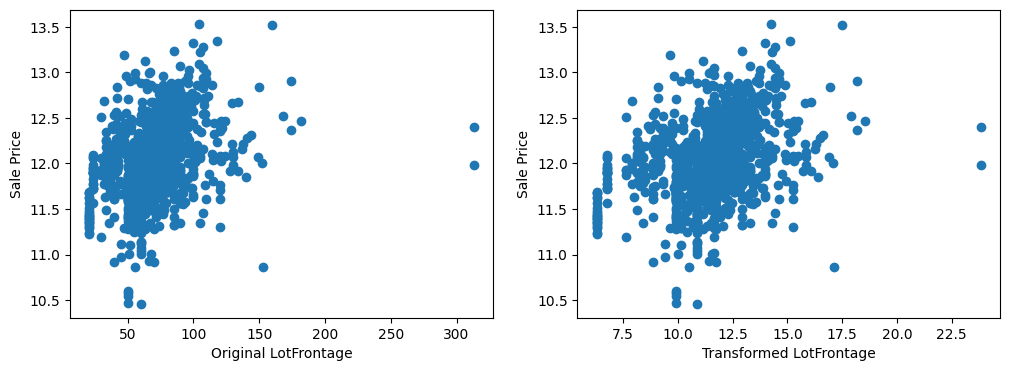

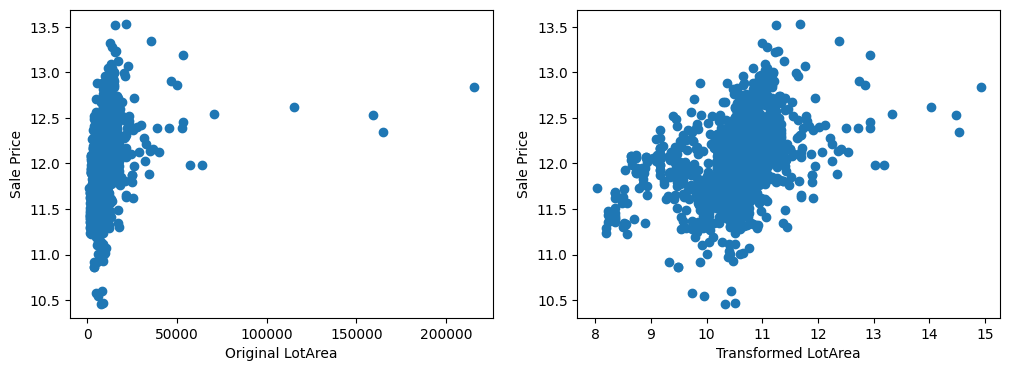

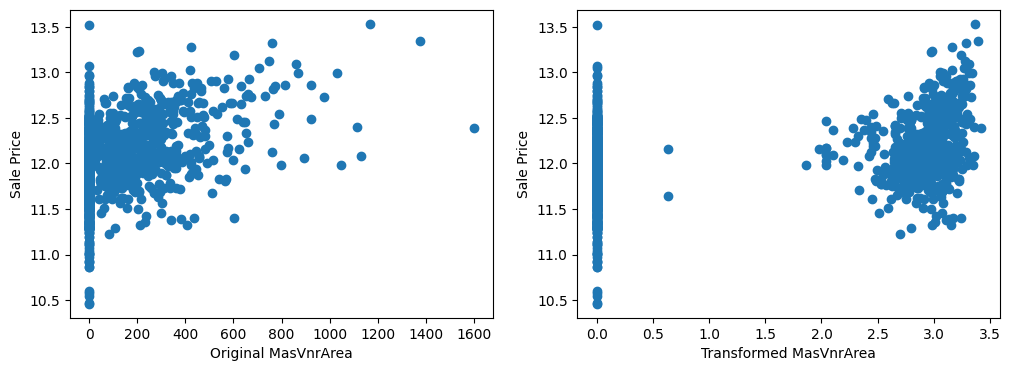

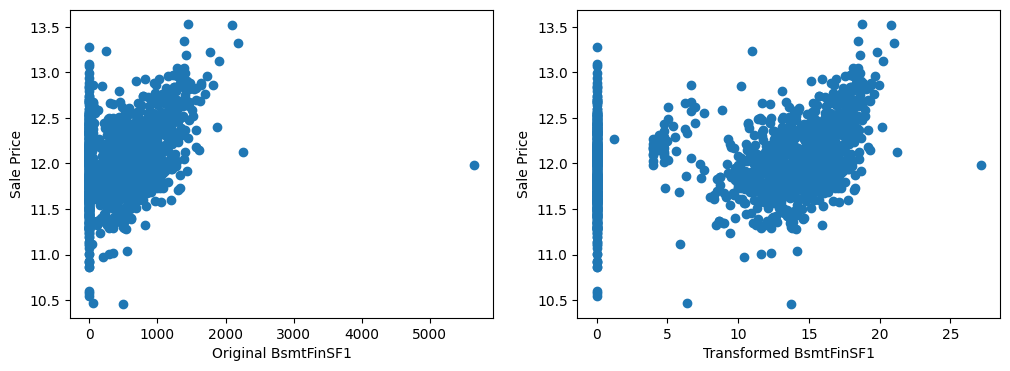

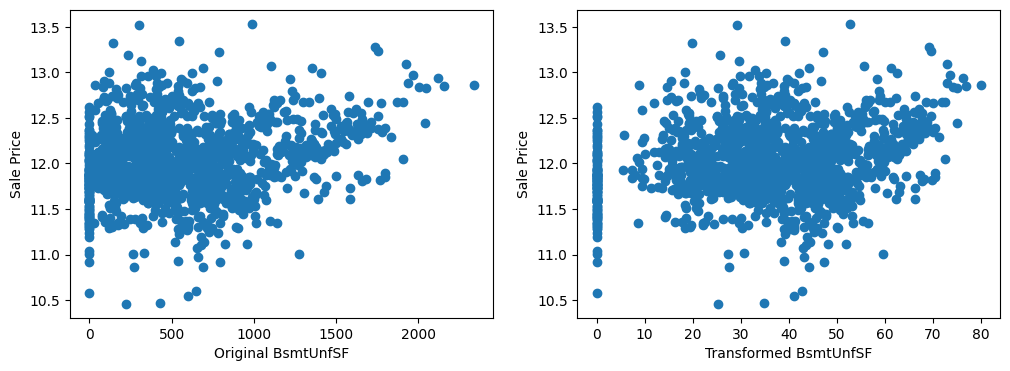

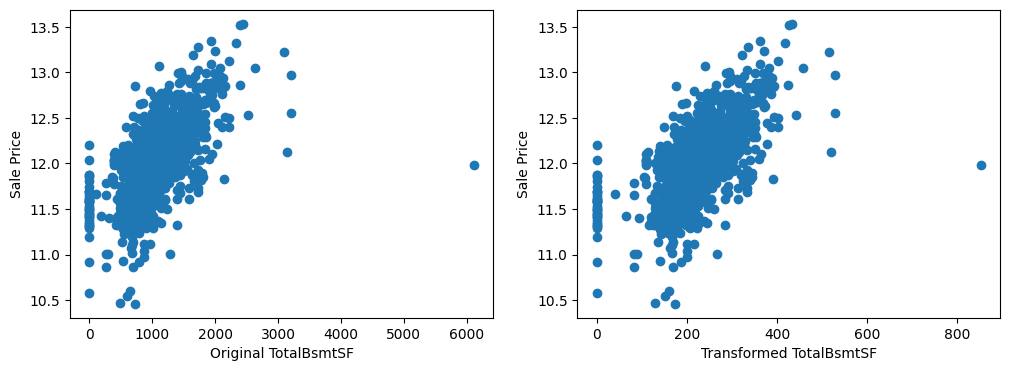

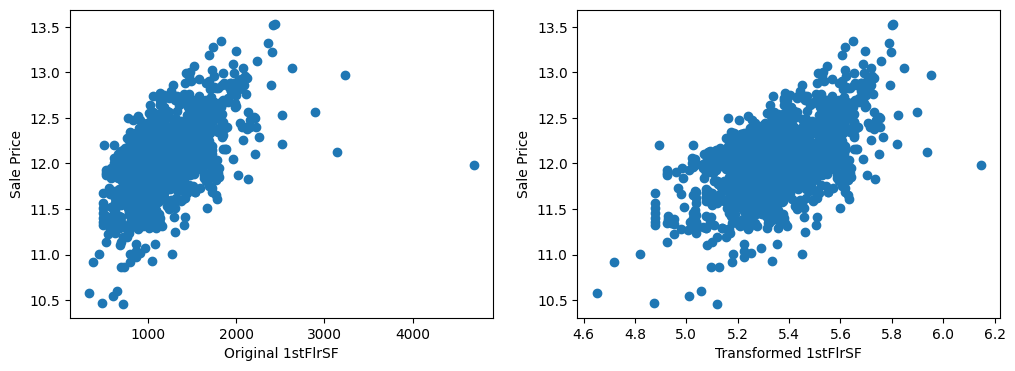

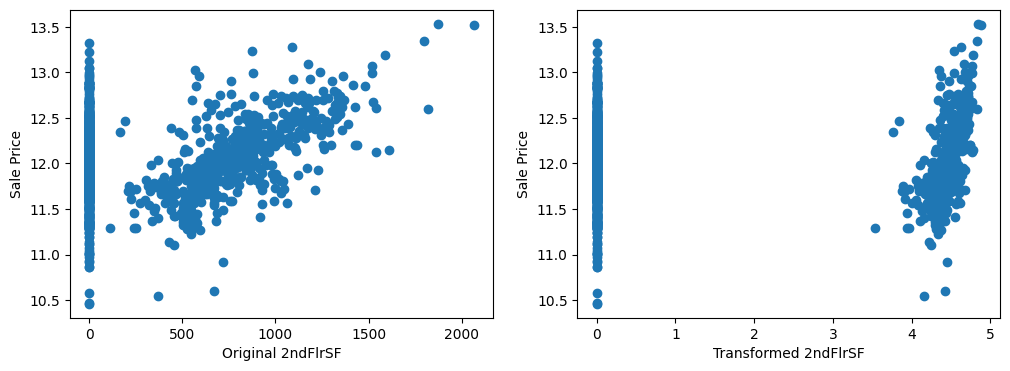

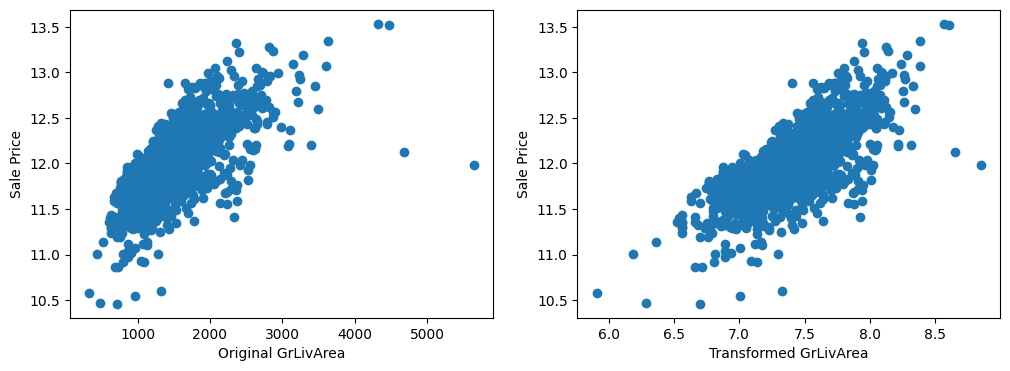

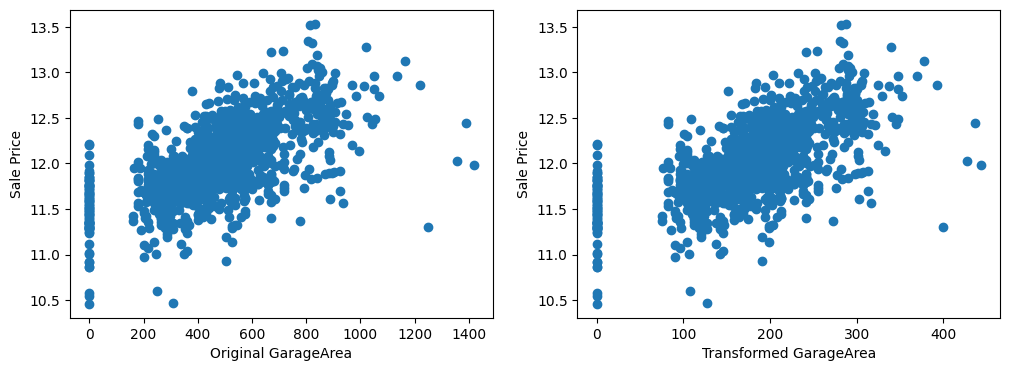

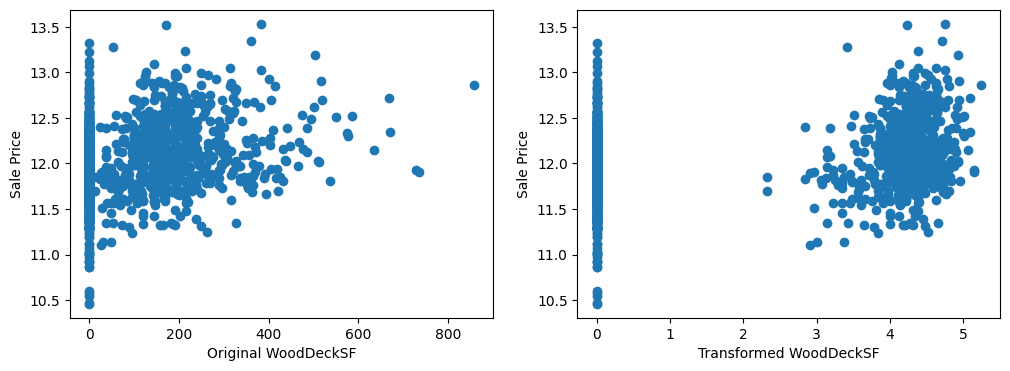

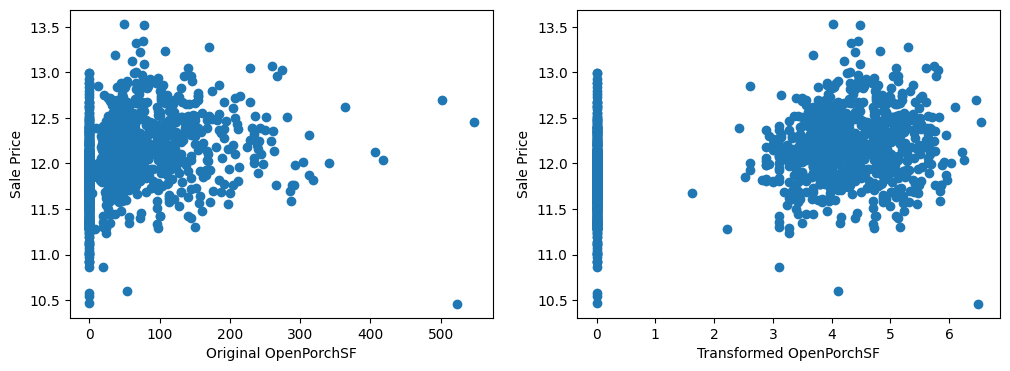

In [76]:
for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

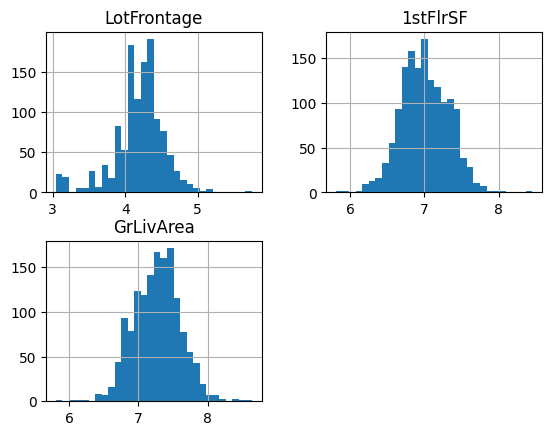

In [78]:
tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

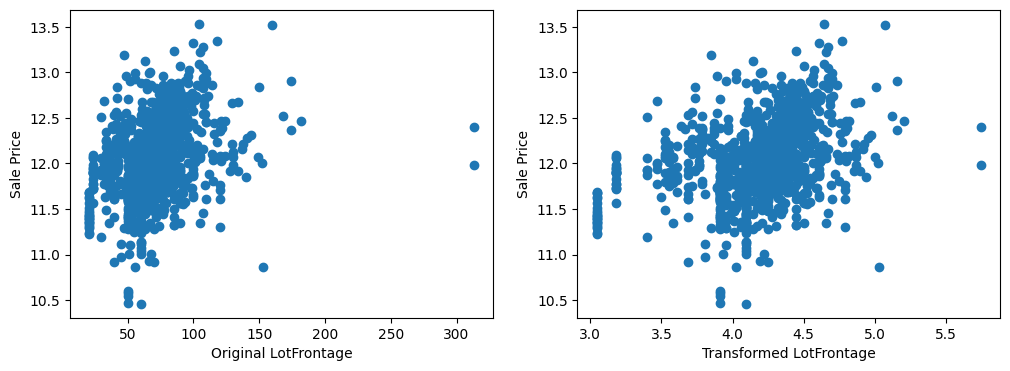

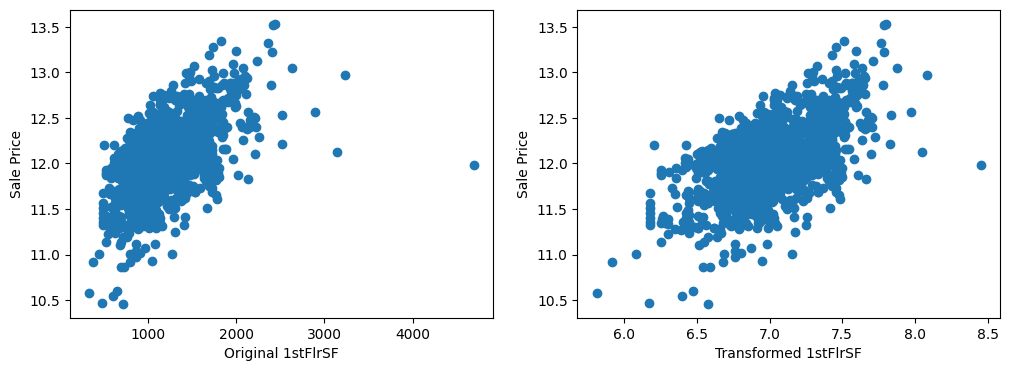

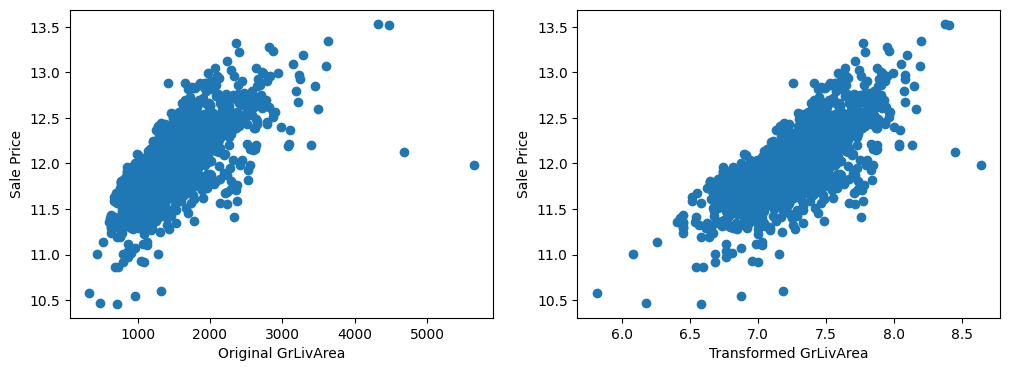

In [80]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()


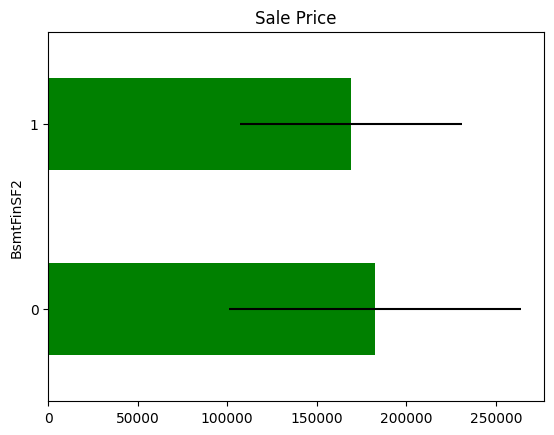

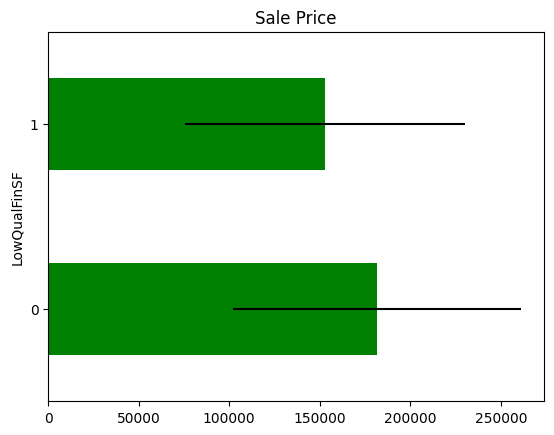

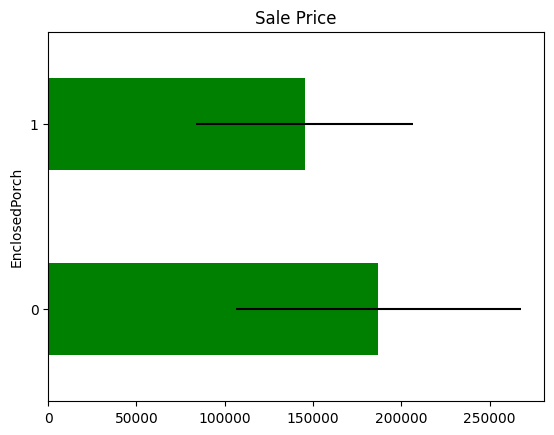

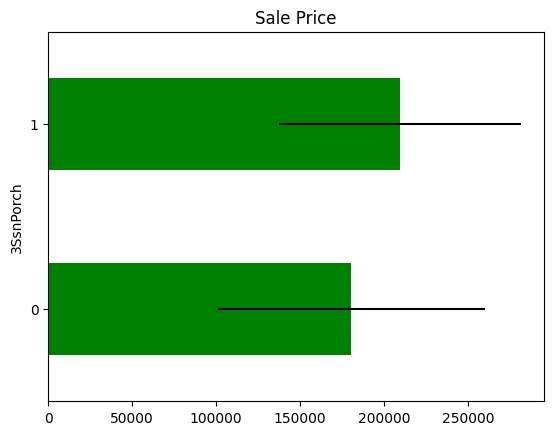

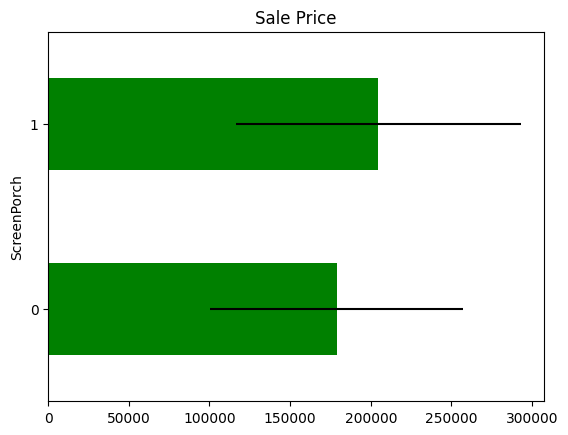

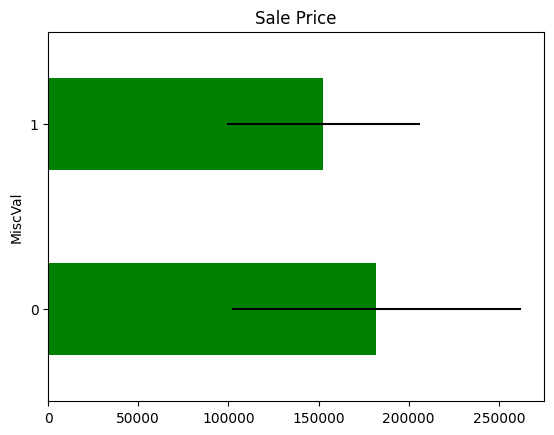

In [82]:
for var in skewed:

    tmp = data.copy()

    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)

    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

In [84]:
print('Number of categorical variables: ', len(cat_vars))
data[cat_vars].head()

Number of categorical variables:  44


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

<Axes: >

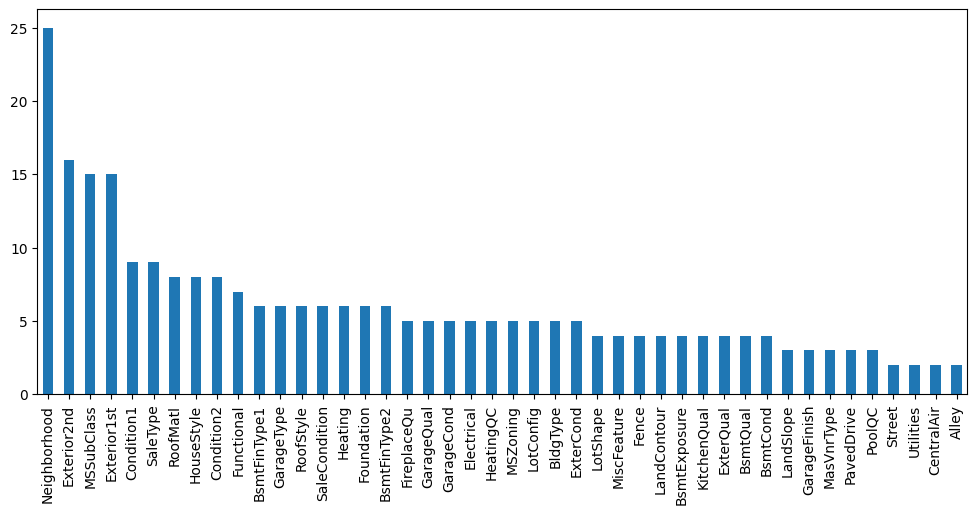

In [86]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [88]:
temp_data = data.copy()

In [90]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    temp_data[var] = data[var].map(qual_mappings)

In [92]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

temp_data[var] = data[var].map(exposure_mappings)

In [94]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    temp_data[var] = data[var].map(finish_mappings)

In [96]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

temp_data[var] = data[var].map(garage_mappings)

In [98]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

temp_data[var] = data[var].map(fence_mappings)

In [100]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

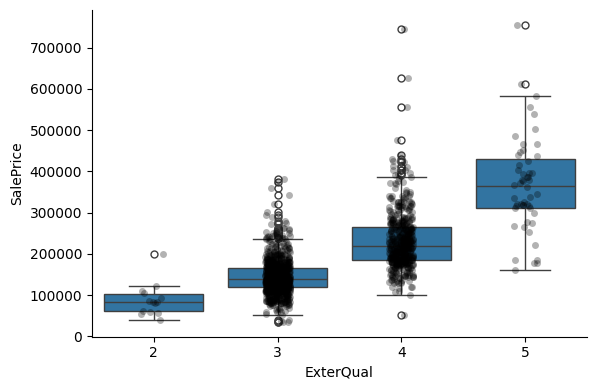

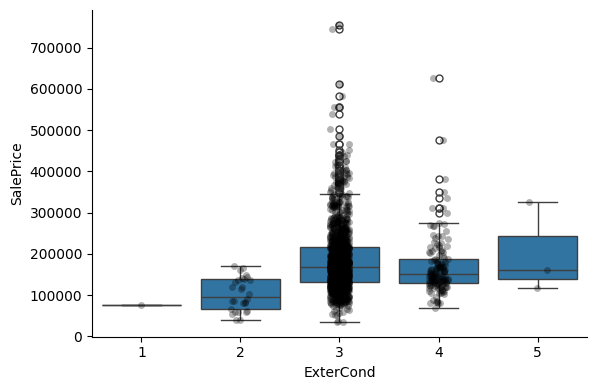

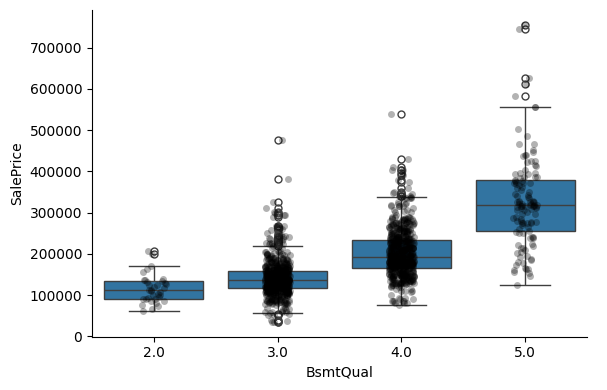

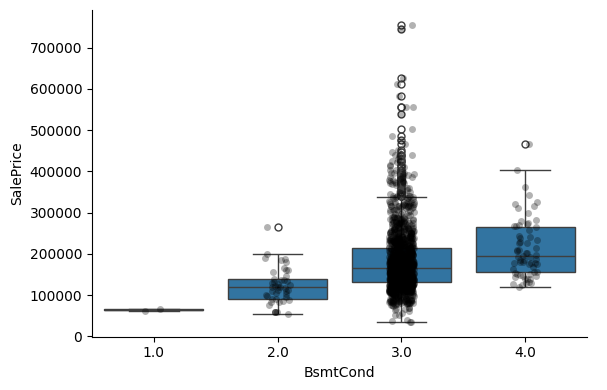

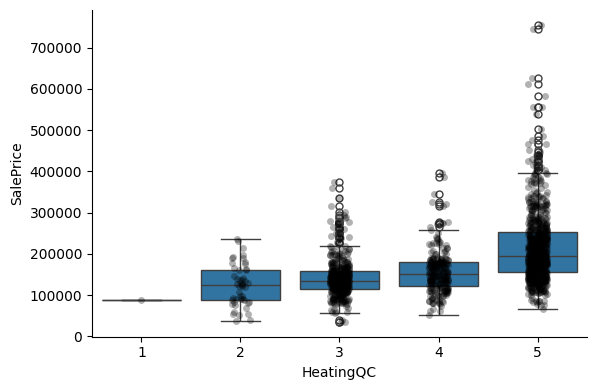

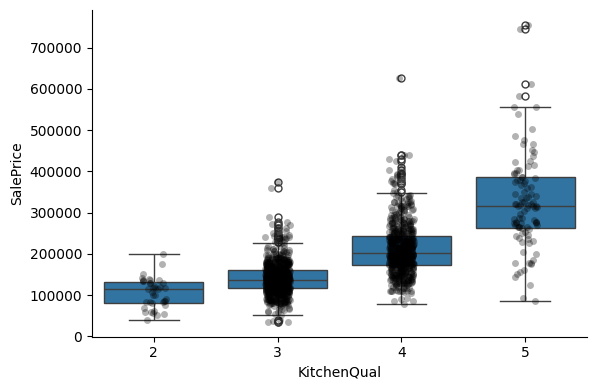

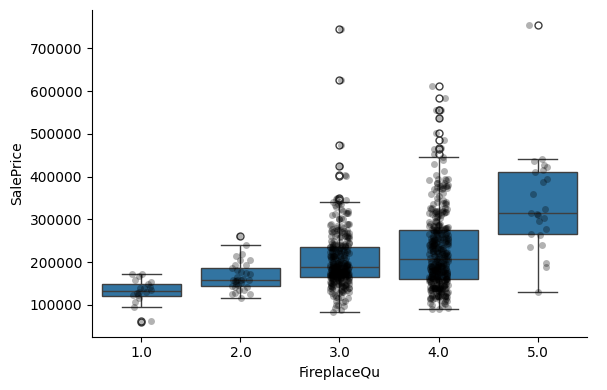

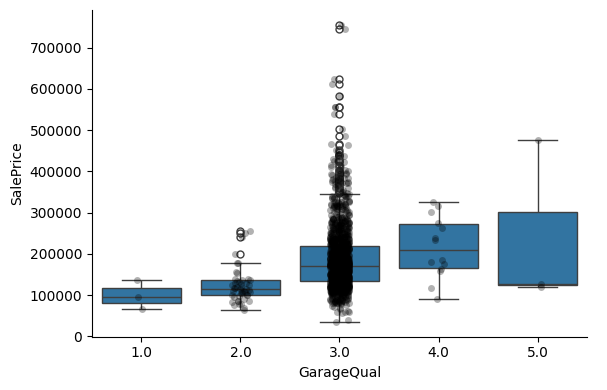

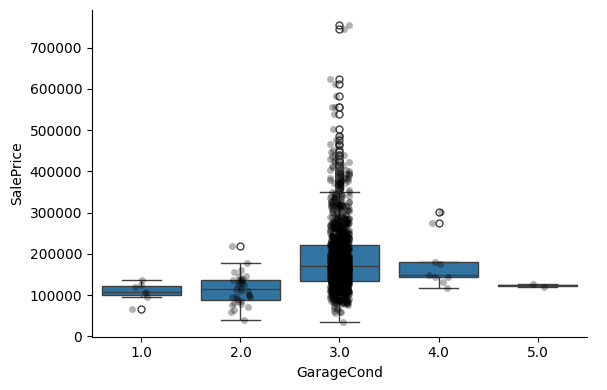

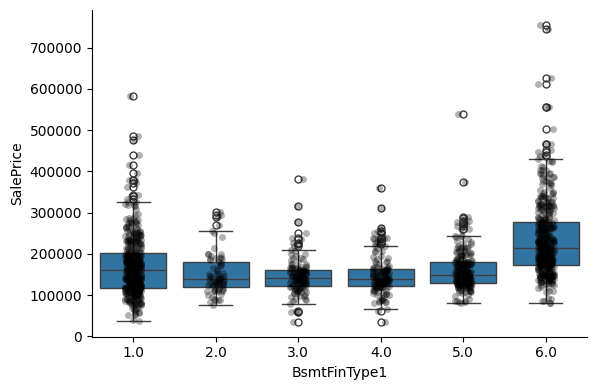

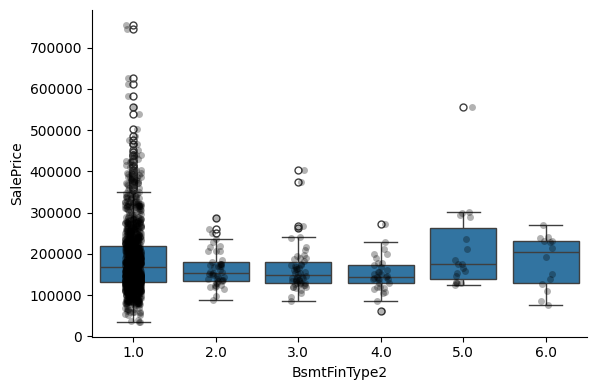

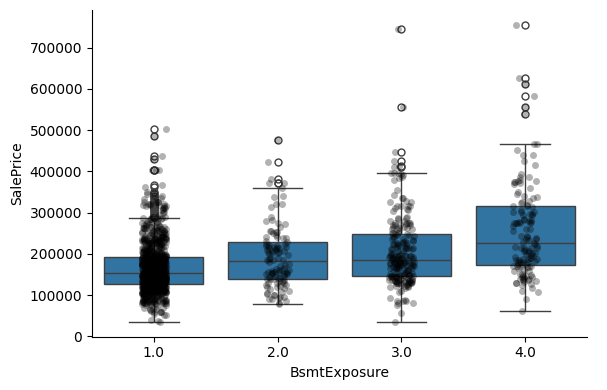

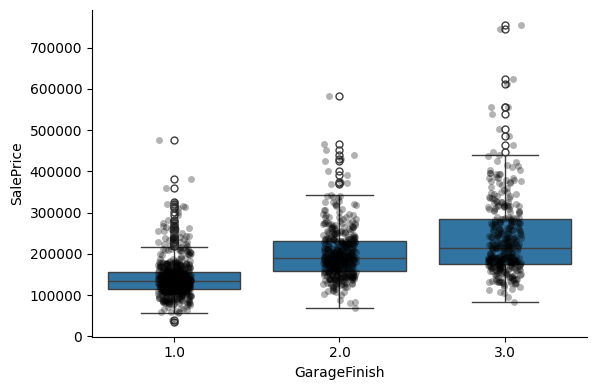

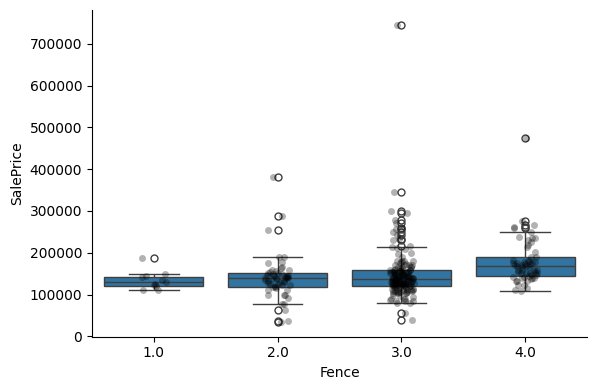

In [102]:
for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=temp_data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=temp_data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [104]:
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [106]:
def return_rare_labels(df, var, rare_perc):
    df = df.copy()

    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

In [108]:
for var in cat_others:
    print(return_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

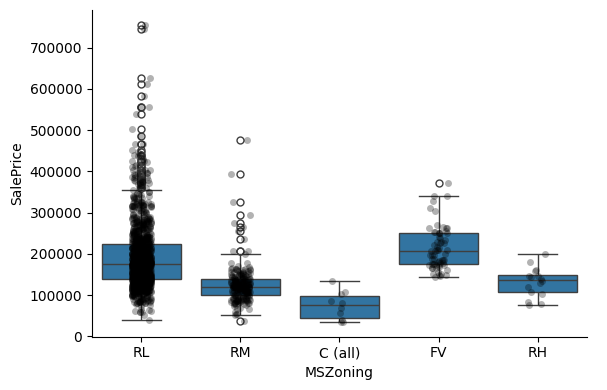

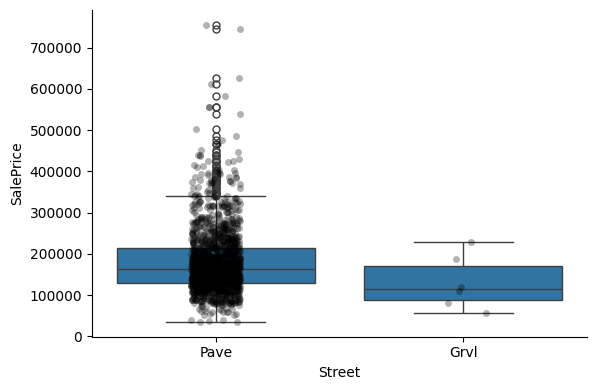

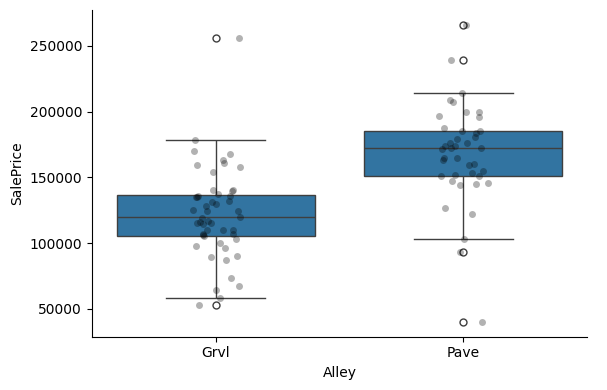

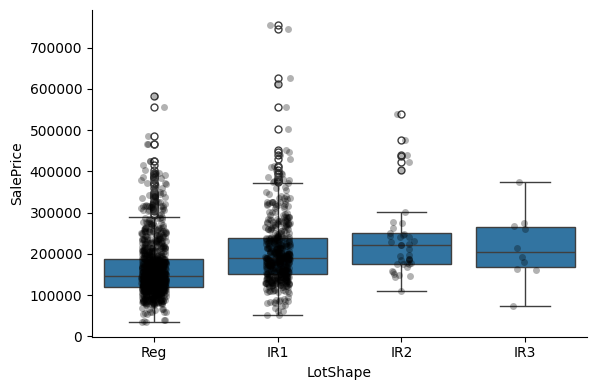

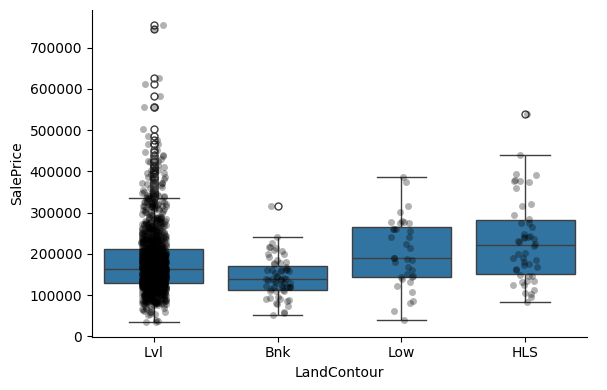

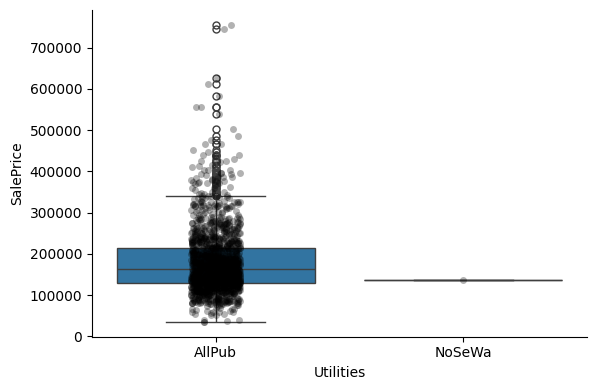

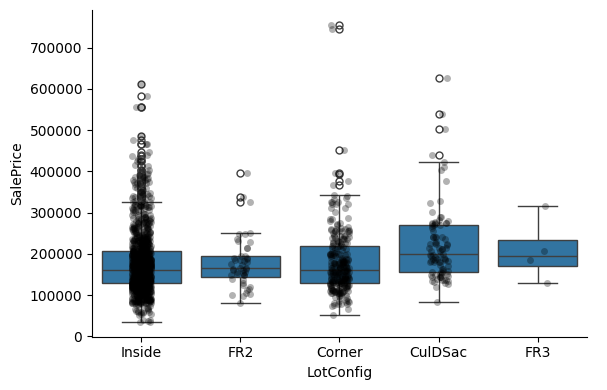

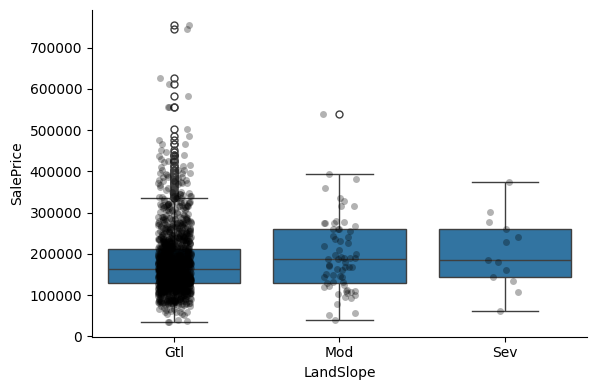

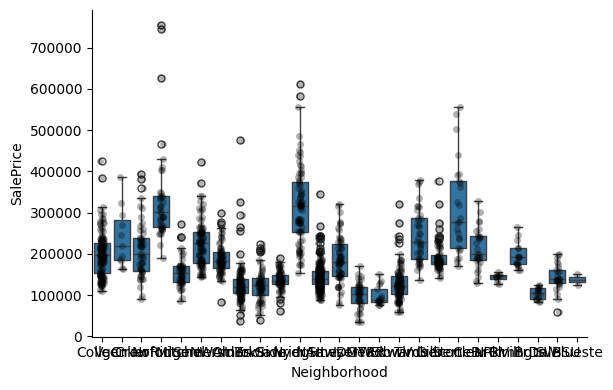

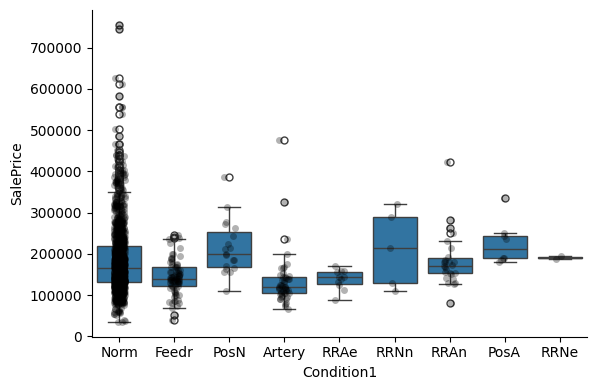

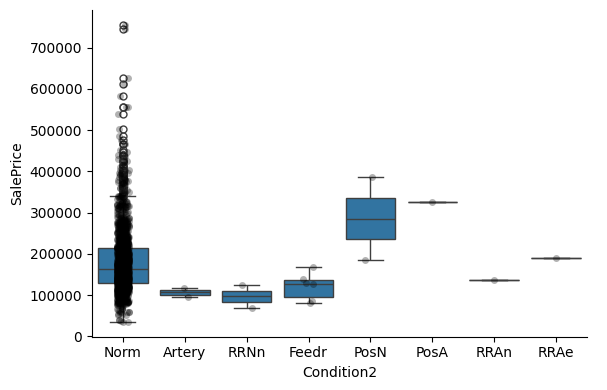

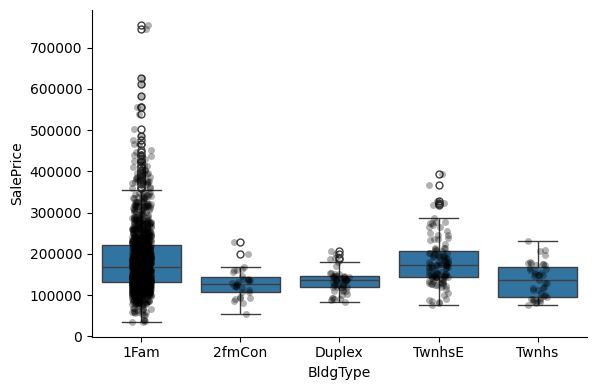

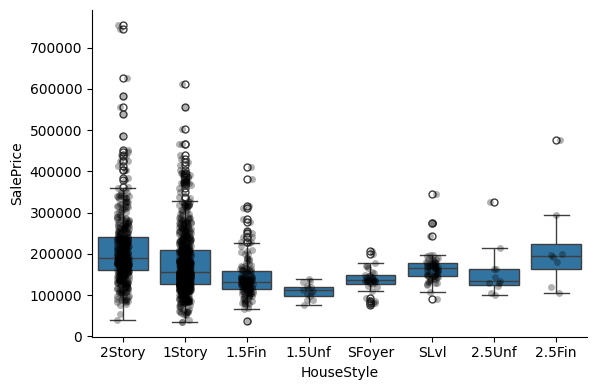

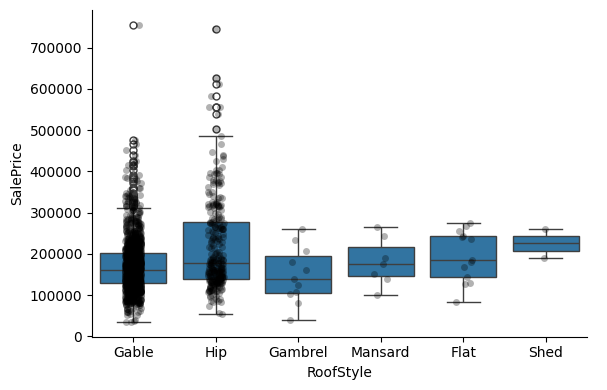

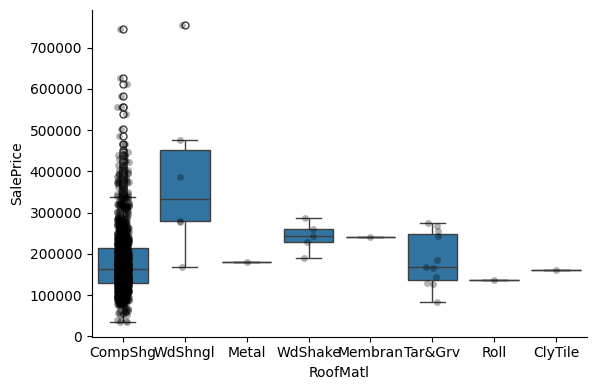

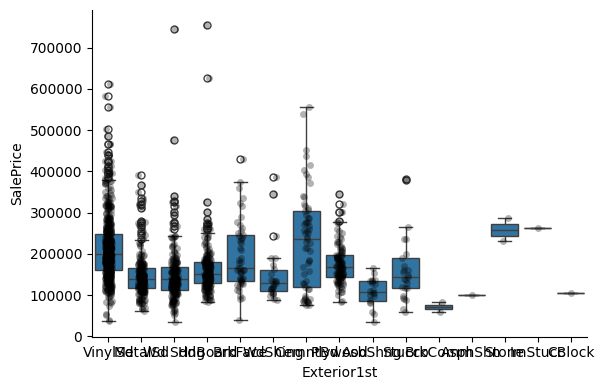

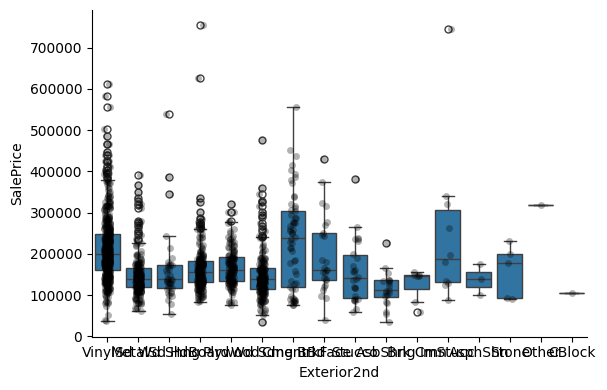

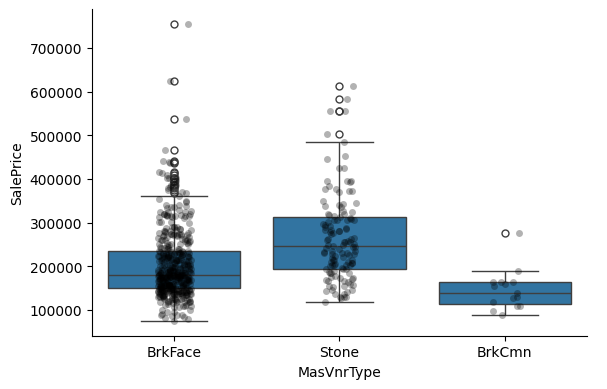

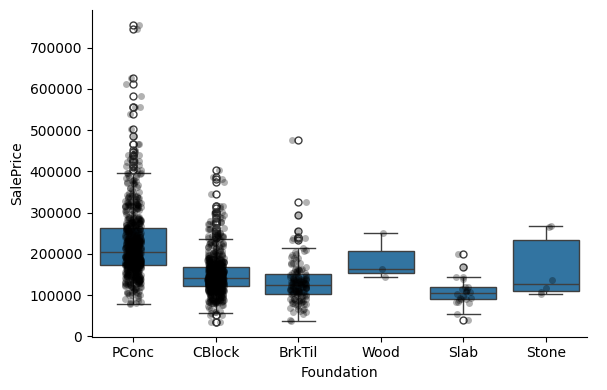

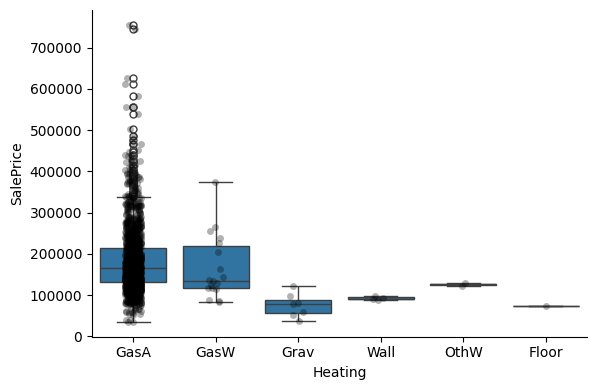

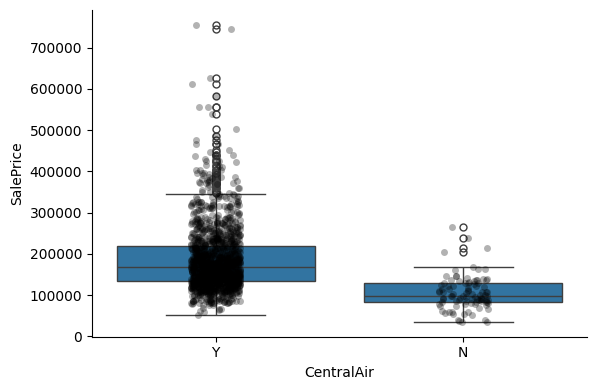

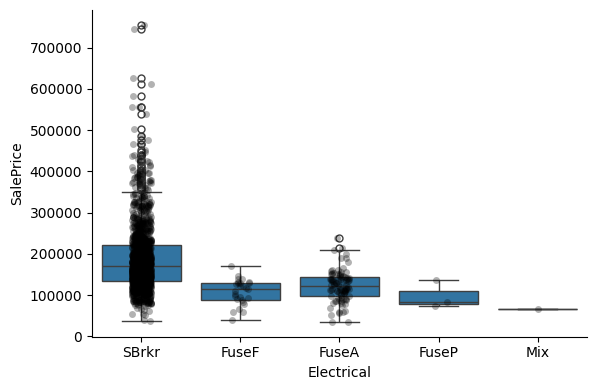

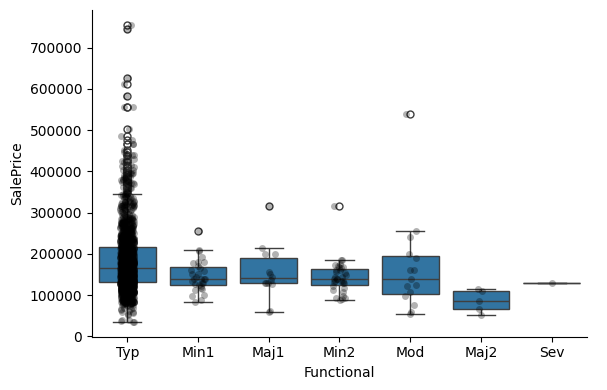

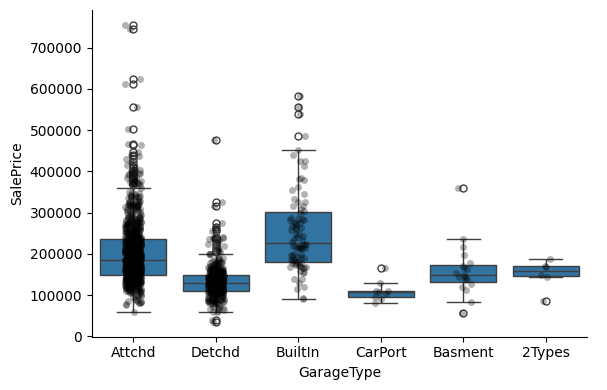

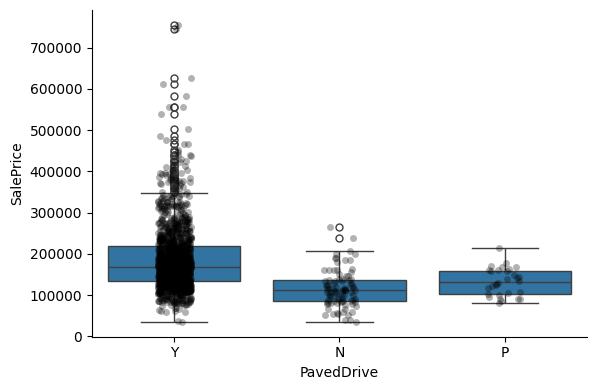

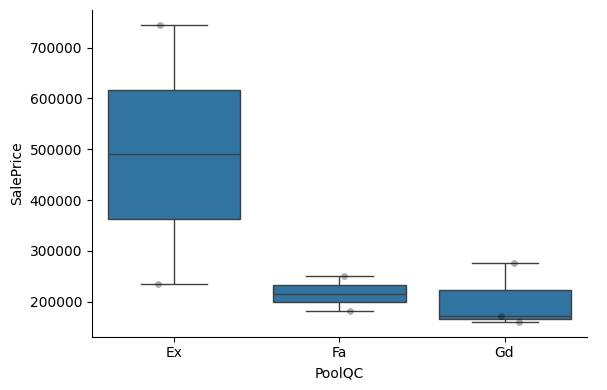

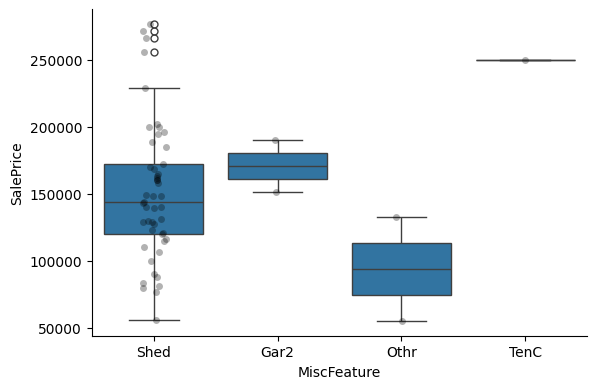

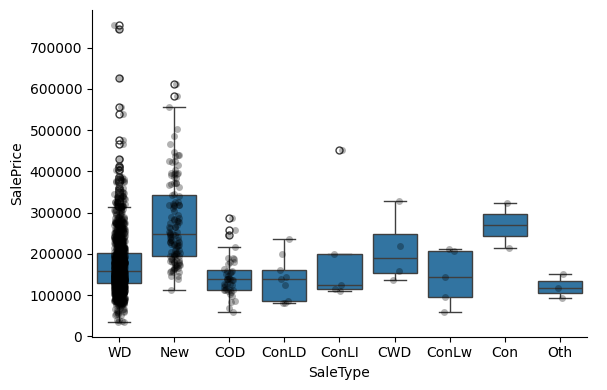

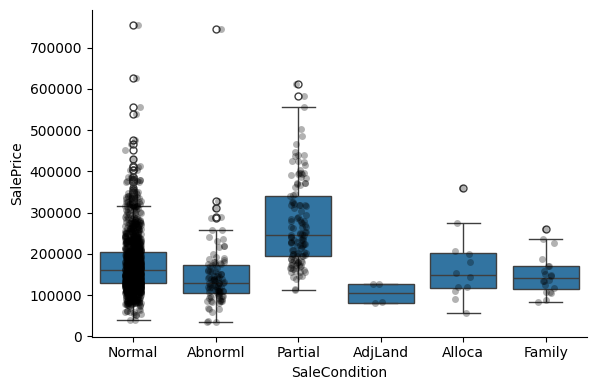

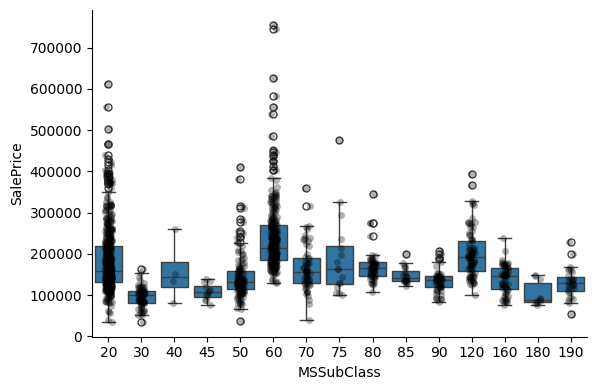

In [110]:
for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()


In [112]:
correlation = data.select_dtypes(include='number').drop("SalePrice", axis=1).apply(lambda x: x.corr(data.SalePrice))
correlation.sort_values(inplace=True, ascending=False)
print(correlation)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [116]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop(['SalePrice'], axis=1), # predictive variables
    data['SalePrice'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_val.shape

((1314, 79), (146, 79))

In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 930 to 684
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   object 
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1081 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          81 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBuilt   

In [120]:
X_train['ExterQual'].value_counts()

ExterQual
TA    814
Gd    440
Ex     47
Fa     13
Name: count, dtype: int64

In [122]:
y_train = np.log(y_train)
y_val = np.log(y_val)

<Axes: ylabel='SalePrice'>

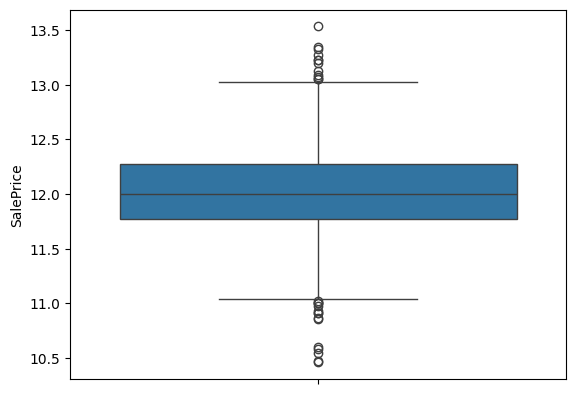

In [124]:
sns.boxplot(y_train)

In [126]:
lower_limit = y_train.mean() - 3 * (y_train.std())
upper_limit = y_train.mean() + 3 * (y_train.std())
lower_limit, upper_limit

(10.816312902968223, 13.231848308277813)

In [128]:
sum((y_train < lower_limit) | (y_train > upper_limit)), sum((y_train < lower_limit) | (y_train > upper_limit)) / 1314

(9, 0.00684931506849315)

In [130]:
data['MasVnrType'].isnull().sum()

872

In [132]:
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_val[cat_vars] = X_val[cat_vars].astype('O')

In [134]:
X_train['KitchenQual'].value_counts()

KitchenQual
TA    664
Gd    522
Ex     91
Fa     37
Name: count, dtype: int64

In [136]:
cat_vars_with_na = [
    var for var in cat_vars
    if X_train[var].isnull().sum() > 0
]

X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
MasVnrType      0.601218
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
Electrical      0.000761
dtype: float64

In [138]:
with_string_missing = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

with_frequent_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [140]:
with_frequent_category

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [142]:
with_string_missing

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [144]:
X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_val[with_string_missing] = X_val[with_string_missing].fillna('Missing')

In [146]:
for var in with_frequent_category:

    mode = X_train[var].mode()[0] # to handle more than one mode for variable

    print(var, mode)

    X_train[var].fillna(mode, inplace=True)
    X_val[var].fillna(mode, inplace=True)

BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [148]:
X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [150]:
[var for var in cat_vars_with_na if X_val[var].isnull().sum() > 0]

[]

In [152]:
len(num_vars)

35

In [154]:
num_na # list that store numerical variables with NaN

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [156]:
X_train[num_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [158]:
for var in num_na:

    # add binary missing indicator (in train and test)
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_val[var + '_na'] = np.where(X_val[var].isnull(), 1, 0)

    # calculate the mean using the train set
    mean_val = X_train[var].mean()
    print(var, mean_val)
    
    X_train[var].fillna(mean_val, inplace=True)
    X_val[var].fillna(mean_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[num_na].isnull().sum()

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [160]:
[var for var in num_na if  X_val[var].isnull().sum() > 0]

[]

In [162]:
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

In [164]:
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

In [166]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_val = elapsed_years(X_val, var)

In [168]:
X_train.drop(['YrSold'], axis=1, inplace=True)
X_val.drop(['YrSold'], axis=1, inplace=True)

In [170]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    X_train[var] = np.log(X_train[var])
    X_val[var] = np.log(X_val[var])

In [172]:
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

In [174]:
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])

X_val['LotArea'] = stats.yeojohnson(X_val['LotArea'], lmbda=param)

print(param)

0.01775557036572992


In [176]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:

    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_val[var] = np.where(X_val[var]==0, 0, 1)

In [178]:
X_train['ExterQual'].value_counts()

ExterQual
TA    814
Gd    440
Ex     47
Fa     13
Name: count, dtype: int64

In [180]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_val[var] = X_val[var].map(qual_mappings)

In [182]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_val[var] = X_val[var].map(exposure_mappings)

In [184]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_val[var] = X_val[var].map(finish_mappings)

In [186]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_val[var] = X_val[var].map(garage_mappings)

In [188]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_val[var] = X_val[var].map(fence_mappings)

In [190]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [192]:
X_train['ExterQual'].isnull().sum()

0

In [194]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [196]:
def find_frequent_labels(df, var, rare_perc):

    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index



for var in cat_others:

    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)

    print(var, frequent_ls)
    print()

    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')

    X_val[var] = np.where(X_val[var].isin(
        frequent_ls), X_val[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

In [198]:
def replace_categories(train, test, y_train, var, target):

    tmp = pd.concat([X_train, y_train], axis=1)

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [200]:
for var in cat_others:
    replace_categories(X_train, X_val, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [202]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

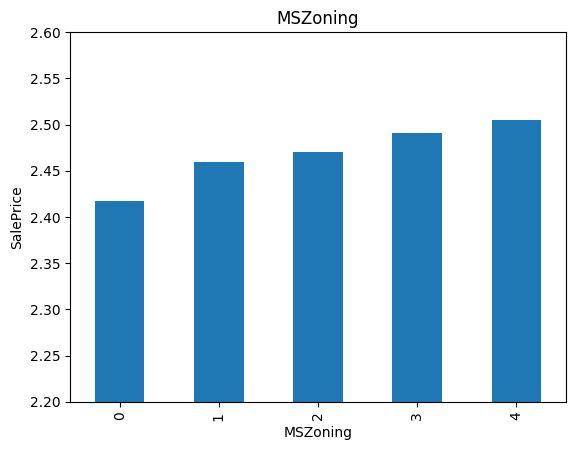

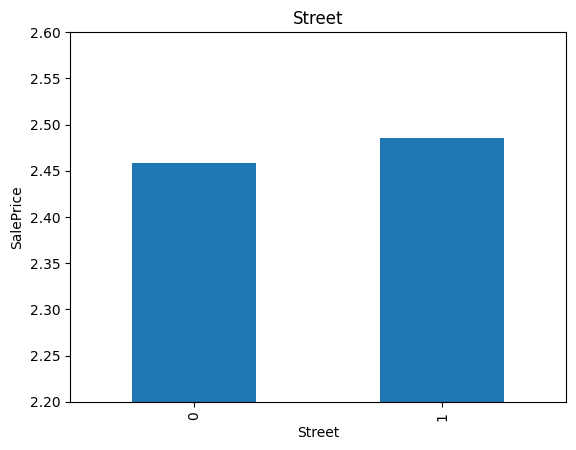

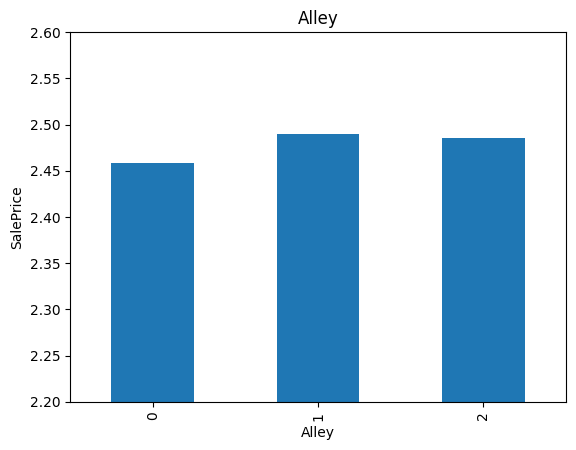

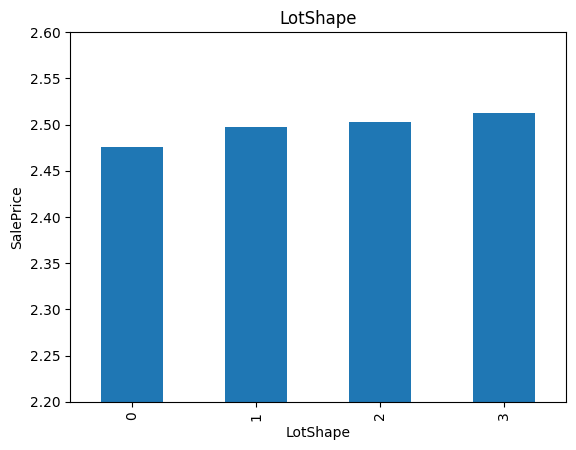

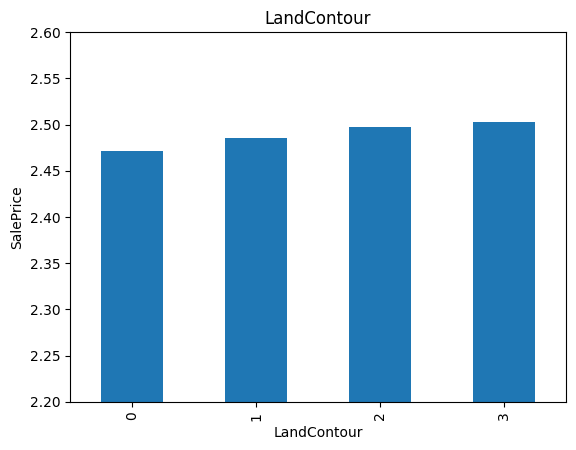

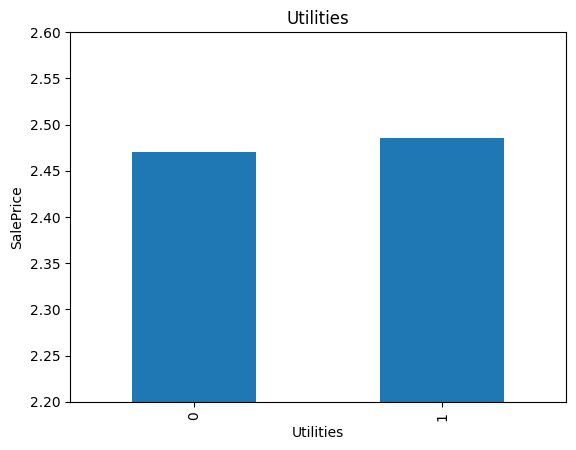

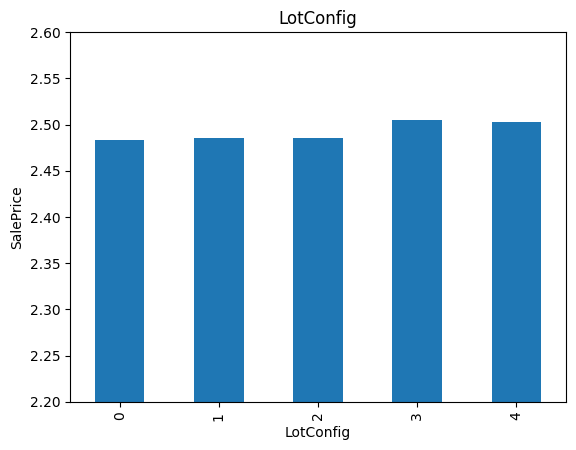

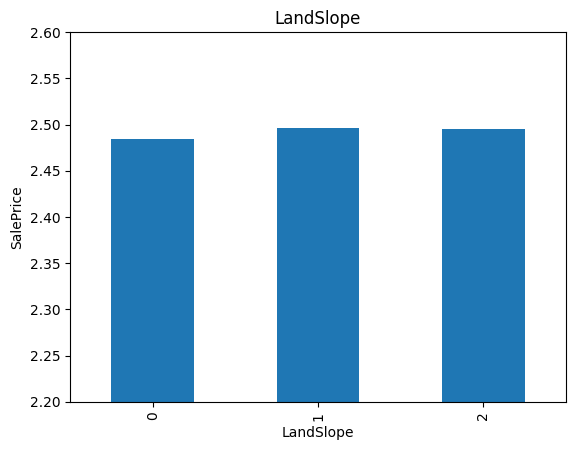

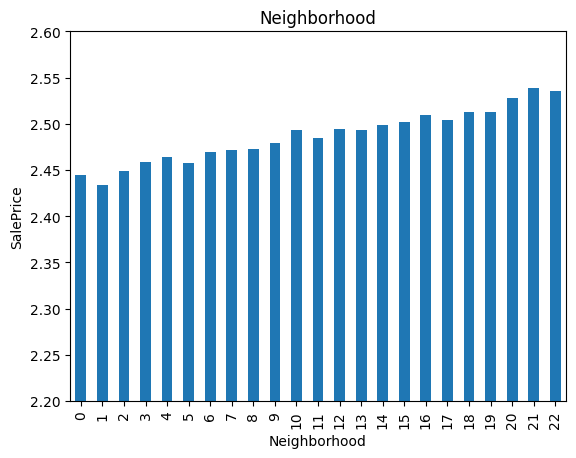

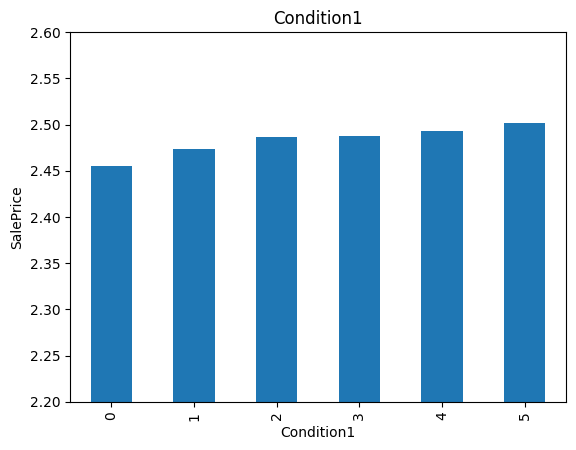

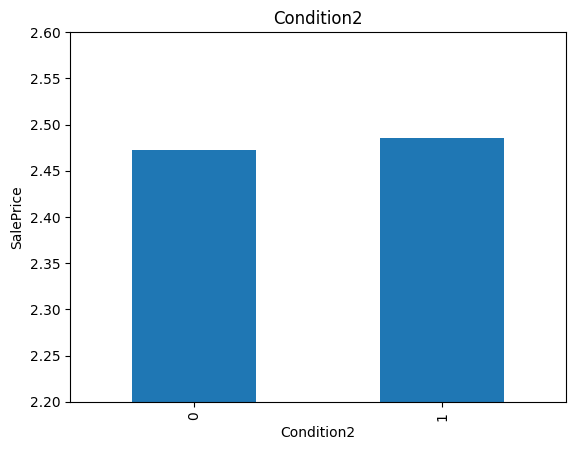

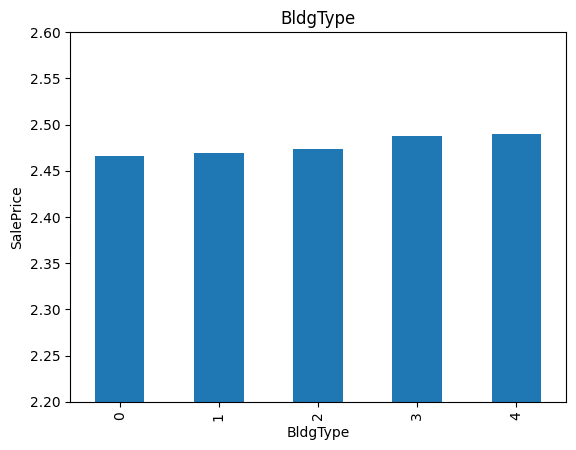

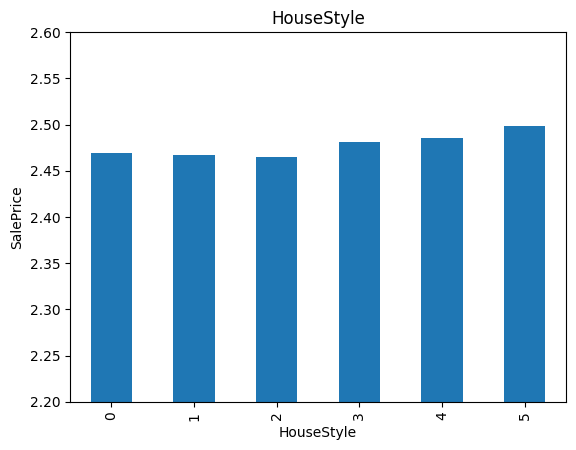

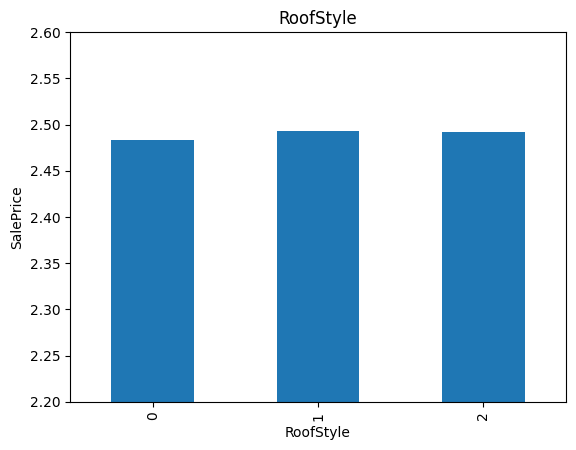

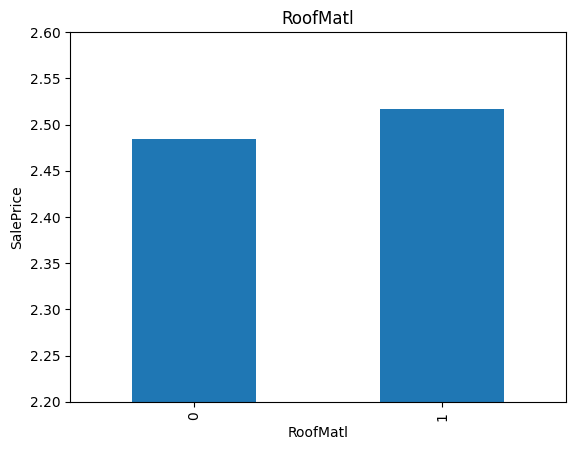

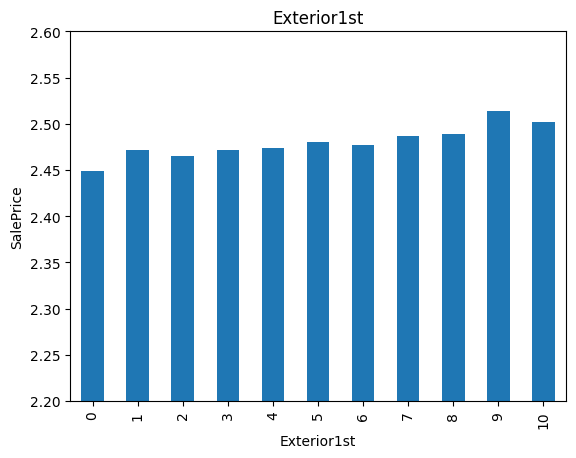

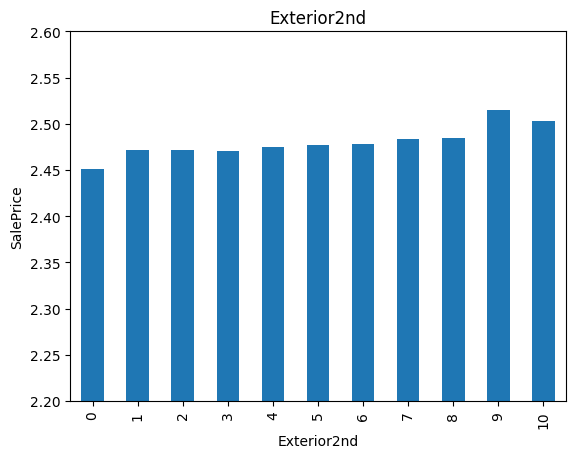

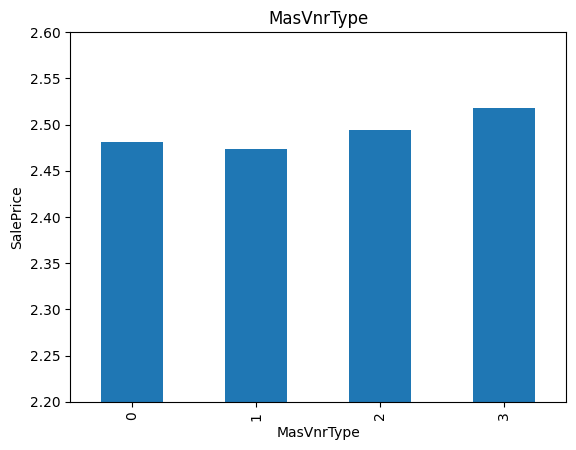

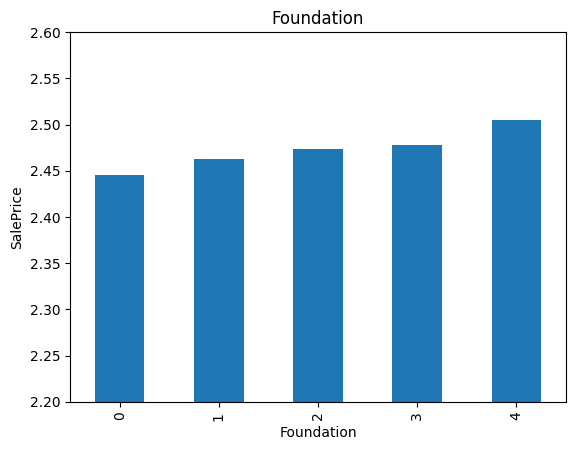

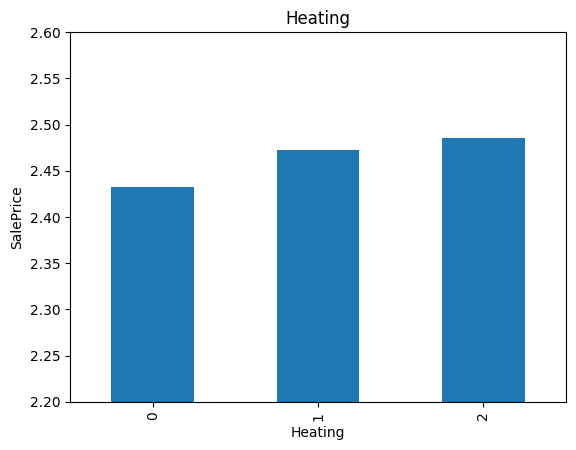

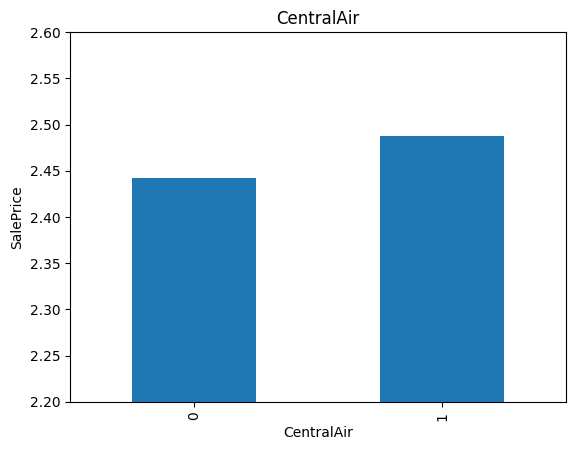

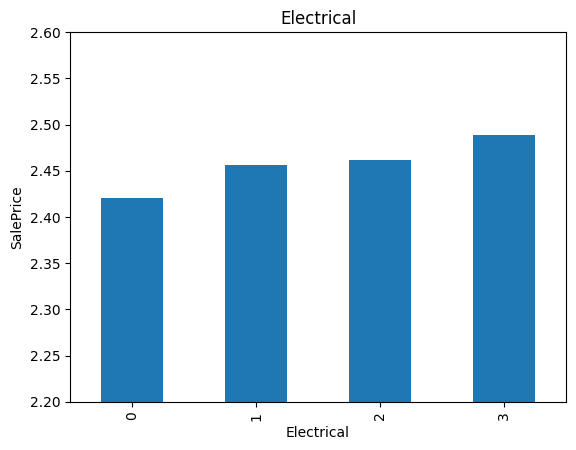

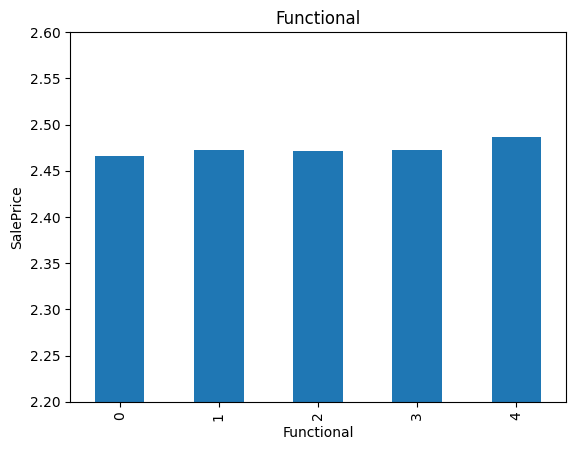

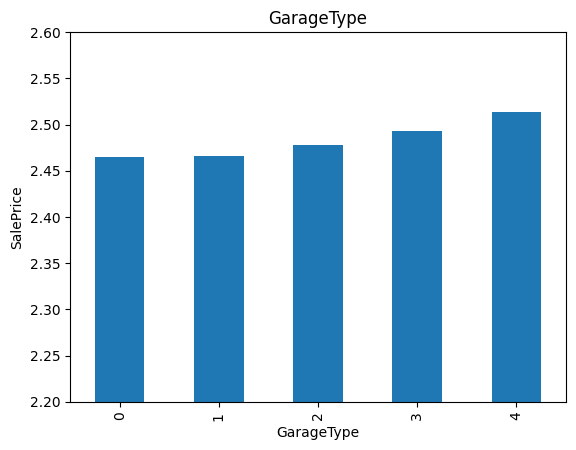

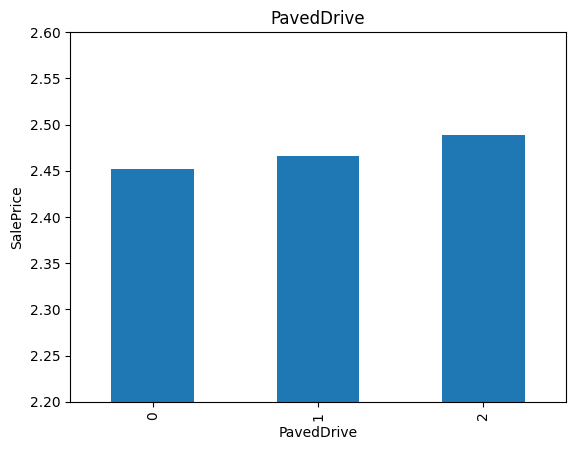

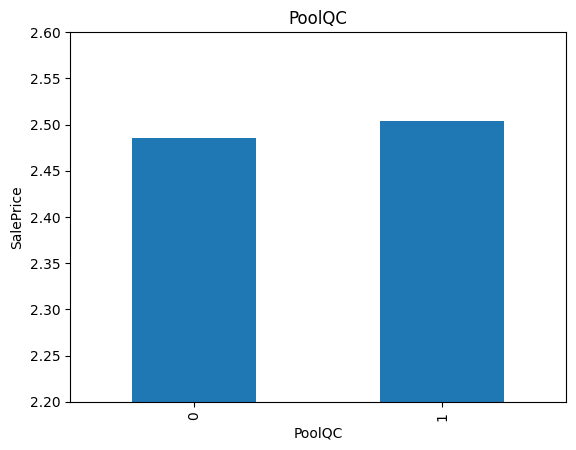

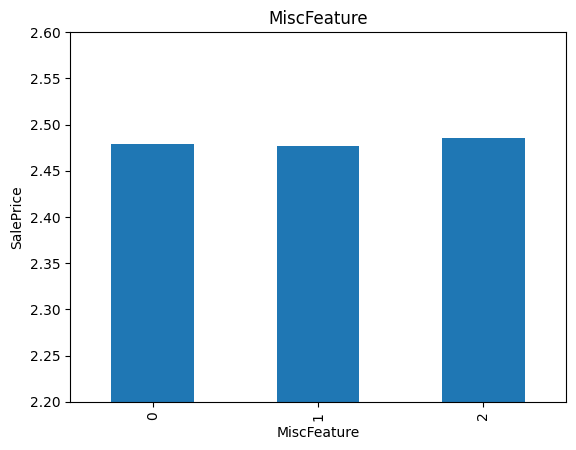

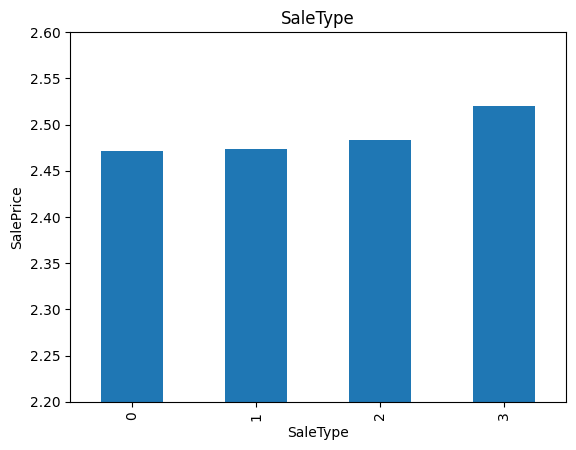

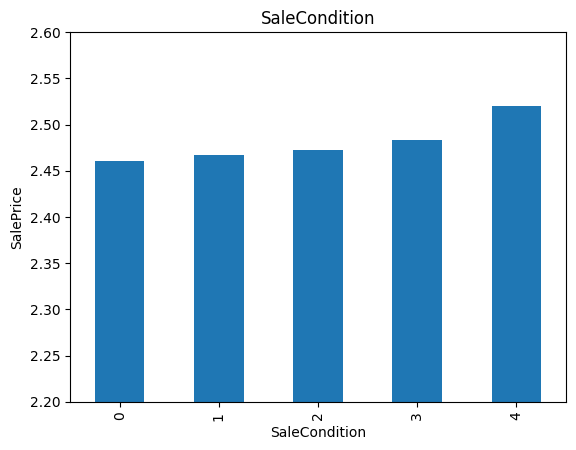

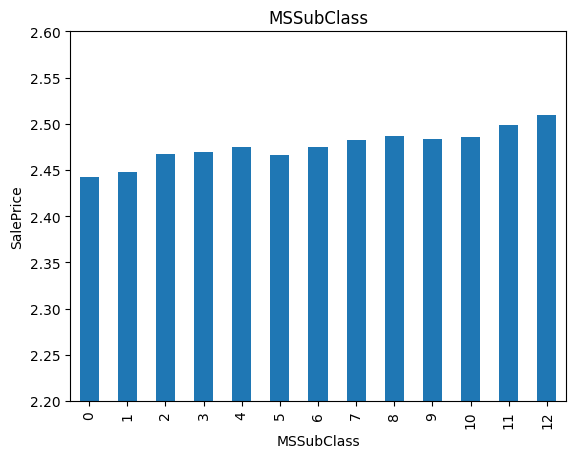

In [204]:
def analyse_vars(train, y_train, var):

    # function plots median house sale price per encoded
    # category

    tmp = pd.concat([X_train, np.log(y_train)], axis=1)

    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()

for var in cat_others:
    analyse_vars(X_train, y_train, var)

In [206]:
train_data = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_data

MSSubClass  MSZoning  LotFrontage    LotArea  Street  Alley  LotShape  \
930            9         3     4.290459   9.872566       1      2         1   
656            9         3     4.276666  10.007176       1      2         1   
45            11         3     4.110874   9.692889       1      2         0   
1348           9         3     4.246776  10.576591       1      2         2   
55             9         3     4.605170  10.026784       1      2         1   
...          ...       ...          ...        ...     ...    ...       ...   
763           12         3     4.406719   9.937279       1      2         0   
835            9         3     4.094345   9.958299       1      2         0   
1216           3         1     4.219508   9.873224       1      2         0   
559           11         3     4.246776   8.676761       1      2         0   
684           12         3     4.060443  10.617969       1      2         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
930             3          1          0          0            19           2   
656             1          1          0          0             8           2   
45              1          1          0          0            21           2   
1348            2          1          0          0            10           2   
55              1          1          0          0             8           2   
...           ...        ...        ...        ...           ...         ...   
763             1          1          0          0            22           2   
835             1          1          0          0             6           2   
1216            1          1          0          0             6           4   
559             1          1          0          0            14           2   
684             1          1          4          0            22           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
930            1         3           3            8            5          2   
656            1         3           3            5            7         49   
45             1         4           3            9            5          5   
1348           1         3           3            7            5          9   
55             1         3           3            6            5         44   
...          ...       ...         ...          ...          ...        ...   
763            1         3           5            8            5         10   
835            1         3           3            4            7         60   
1216           1         1           1            6            5         32   
559            1         4           3            7            5          3   
684            1         3           5            7            5         12   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
930              2          0         0           10           10           1   
656              2          0         0            6            6           2   
45               5          2         0            3            2           2   
1348             9          0         0           10           10           1   
55              44          0         0            6            7           2   
...            ...        ...       ...          ...          ...         ...   
763             10          0         0           10           10           2   
835             15          0         0           10            6           1   
1216            32          0         0           10           10           1   
559              2          0         0           10           10           2   
684             12          0         0           10           10           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
930          0.0          4          3           4         4         3   
656         54.0          

In [208]:
correlation = train_data.drop("SalePrice", axis=1).apply(lambda x: x.corr(train_data.SalePrice))
correlation.sort_values(inplace=True, ascending=False)
correlation = correlation.round(3)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(correlation)

OverallQual       0.814
Neighborhood      0.743
GrLivArea         0.726
GarageCars        0.692
ExterQual         0.679
KitchenQual       0.667
BsmtQual          0.657
GarageArea        0.656
1stFlrSF          0.613
TotalBsmtSF       0.610
FullBath          0.585
GarageFinish      0.570
MSSubClass        0.562
FireplaceQu       0.552
Foundation        0.551
TotRmsAbvGrd      0.532
Fireplaces        0.492
HeatingQC         0.474
MasVnrType        0.432
MasVnrArea        0.426
GarageType        0.421
MSZoning          0.417
Exterior1st       0.414
LotArea           0.403
Exterior2nd       0.399
BsmtFinSF1        0.376
CentralAir        0.357
BsmtExposure      0.339
LotFrontage       0.333
BsmtFinType1      0.332
WoodDeckSF        0.332
PavedDrive        0.317
HalfBath          0.312
OpenPorchSF       0.311
2ndFlrSF          0.311
Electrical        0.306
HouseStyle        0.300
SaleCondition     0.296
LotShape          0.292
SaleType          0.268
BsmtFullBath      0.250
BsmtCond        

In [210]:
train_data['ExterQual'].value_counts()

ExterQual
3    814
4    440
5     47
2     13
Name: count, dtype: int64

In [212]:
correlation = train_data.corrwith(train_data["SalePrice"])
correlation.sort_values(inplace=True, ascending=False)
correlation = correlation.round(3)

print(correlation)

SalePrice         1.000
OverallQual       0.814
Neighborhood      0.743
GrLivArea         0.726
GarageCars        0.692
                  ...  
EnclosedPorch    -0.225
GarageYrBlt_na   -0.336
GarageYrBlt      -0.501
YearRemodAdd     -0.576
YearBuilt        -0.585
Length: 82, dtype: float64


In [214]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [216]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

In [218]:
X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_val.columns
)

In [220]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171  0.366365     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066  0.388528     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699  0.336782     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002  0.482280     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658  0.391756     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4

In [222]:
y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [228]:
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

In [230]:
estimators = [50, 100, 150, 200]

In [232]:
cv_results = {}

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

In [234]:
for name, model in models:
    # If the model has 'n_estimators' parameter
    if hasattr(model, 'n_estimators'):
        for n in estimators:
            model.set_params(n_estimators=n) 
            scores = cross_val_score(model,  X_train, y_train, cv=k_folds, scoring='neg_mean_squared_error')
            cv_results[f'{name} (n_estimators={n})'] = np.mean(scores)  # Store the mean CV score
    else:
        # For Linear Regression or any model without 'n_estimators'
        scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='neg_mean_squared_error')
        cv_results[name] = np.mean(scores)  # Store the mean CV score

In [236]:
for model, score in cv_results.items():
    print(f'{model}: MSE {abs(score):.4f}')

Linear Regression: MSE 240656724630453792800768.0000
Random Forest (n_estimators=50): MSE 0.0214
Random Forest (n_estimators=100): MSE 0.0209
Random Forest (n_estimators=150): MSE 0.0208
Random Forest (n_estimators=200): MSE 0.0208
Gradient Boosting (n_estimators=50): MSE 0.0184
Gradient Boosting (n_estimators=100): MSE 0.0166
Gradient Boosting (n_estimators=150): MSE 0.0161
Gradient Boosting (n_estimators=200): MSE 0.0160
XGBoost (n_estimators=50): MSE 0.0204
XGBoost (n_estimators=100): MSE 0.0204
XGBoost (n_estimators=150): MSE 0.0204
XGBoost (n_estimators=200): MSE 0.0204


In [238]:
print("Cross-validation results:", cv_results)

Cross-validation results: {'Linear Regression': -2.406567246304538e+23, 'Random Forest (n_estimators=50)': -0.02143292287839802, 'Random Forest (n_estimators=100)': -0.02094798496409856, 'Random Forest (n_estimators=150)': -0.020811324284808422, 'Random Forest (n_estimators=200)': -0.02079596626278339, 'Gradient Boosting (n_estimators=50)': -0.01837057517499028, 'Gradient Boosting (n_estimators=100)': -0.016581038304066903, 'Gradient Boosting (n_estimators=150)': -0.016102616386009863, 'Gradient Boosting (n_estimators=200)': -0.016033956917827635, 'XGBoost (n_estimators=50)': -0.020448262772289907, 'XGBoost (n_estimators=100)': -0.02042840155582313, 'XGBoost (n_estimators=150)': -0.020442548637444886, 'XGBoost (n_estimators=200)': -0.020442453170646184}


In [240]:
if cv_results:
    model_names = list(cv_results.keys())
    model_results = [abs(score) for score in cv_results.values()] 
    
sorted_results = sorted(zip(model_names, model_results), key=lambda x: x[1])
sorted_model_names, sorted_model_results = zip(*sorted_results)  # Unzip sorted results


results_df = pd.DataFrame({
    'Model': sorted_model_names,
    'MSE': sorted_model_results
})

In [242]:
mask = results_df["Model"] =="Linear Regression"

results_without_lr = results_df[~mask]

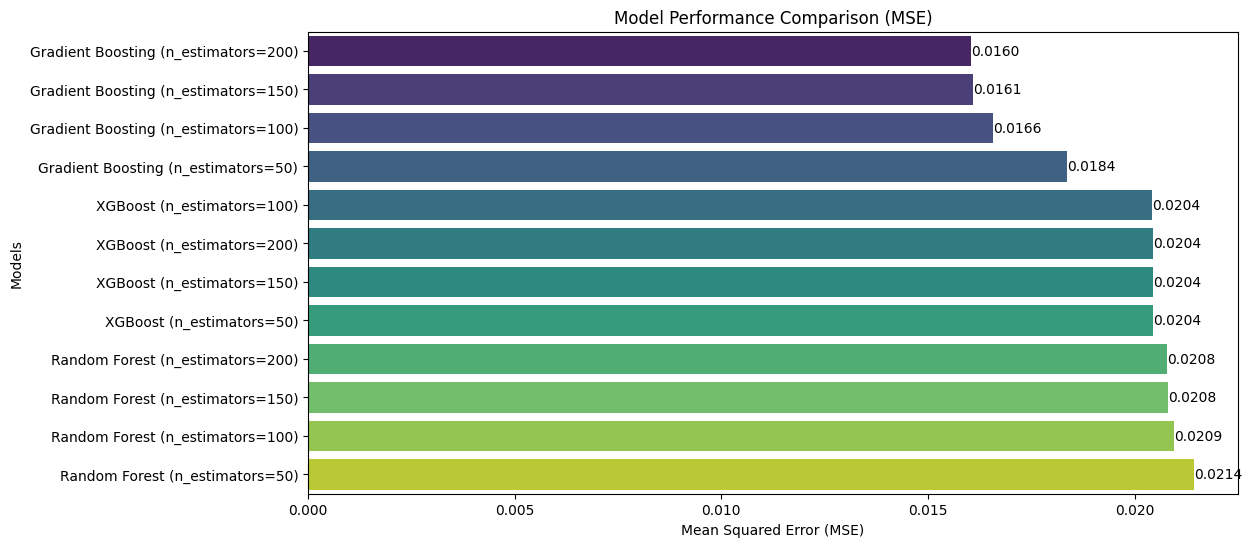

In [244]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_without_lr, x='MSE', y='Model', palette='viridis')

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Models')
plt.title('Model Performance Comparison (MSE)')

for index, value in enumerate(results_without_lr['MSE']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.show()

In [246]:
y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

In [248]:
final_gbr = GradientBoostingRegressor(n_estimators=200)

final_gbr.fit(X_train, y_train)

y_pred = final_gbr.predict(X_val)

In [250]:
MSE_validation = mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=True)
print(f'GBR Mean squared error: {MSE_validation}')

GBR Mean squared error: 956275958.986867


In [252]:
MAE_validation = mean_absolute_error(np.exp(y_val), np.exp(y_pred))
print(f'GBR Mean absolute error: {MAE_validation}')

GBR Mean absolute error: 16382.639315321047


In [254]:
R2 = r2_score(np.exp(y_val), np.exp(y_pred))
print(f'R2 score: {R2}')

R2 score: 0.860846927168905
